# Weather Trend Analytics Across Indian Cities

## Problem Statement
Climate variability has a significant impact on agriculture, urban planning, disaster management and public health. India, being geographically diverse, experiences wide variations in temperature, rainfall, humidity and wind patterns across different regions.

The objective of this project is to analyze long-term weather trends across major Indian cities by studying:

Monthly, seasonal and yearly variations in

- Maximum & minimum temperature

 - Precipitation

  - Atmospheric pressure

- Wind speed and wind direction

The project also focuses on:

- Identifying extreme weather events such as heatwaves and heavy rainfall.

- Performing correlation analysis between climatic parameters.

-  Building machine learning based forecasting models to predict future temperature trends.

- This study helps in understanding climate behavior patterns and supports data-driven decision making for environmental monitoring and planning.


In [1]:
# INSTALL REQUIRED LIBRARIES
!pip install pandas numpy matplotlib seaborn scikit-learn requests

##Project Environment Setup

This section sets up the required folder structure to organize datasets, notebooks, plots and reports.

The project environment was successfully initialized with dedicated folders for data storage, visualization outputs, notebooks, and documentation.

In [2]:
# created folder structure
import os

folders = ['data', 'notebooks', 'plots', 'report']
for f in folders:
    os.makedirs(f, exist_ok=True)

print("Project folders created successfully!")


Project folders created successfully!


## City Coordinates Setup

This section defines the latitude and longitude of major Indian cities
used to fetch historical weather data from the Open-Meteo API.

The geographical coordinates of six major Indian cities were finalized, enabling accurate retrieval of historical weather data for further analysis.


In [3]:
# select cities and their coordinates
cities = {
    "Mumbai": (19.0760, 72.8777),
    "Delhi": (28.7041, 77.1025),
    "Chennai": (13.0827, 80.2707),
    "Bengaluru": (12.9716, 77.5946),
    "Kolkata": (22.5726, 88.3639),
    "Trivandrum": (8.5241, 76.9366)
}
print("Selected cities and coordinates:")
for city, coords in cities.items():
    print(city, coords)


Selected cities and coordinates:
Mumbai (19.076, 72.8777)
Delhi (28.7041, 77.1025)
Chennai (13.0827, 80.2707)
Bengaluru (12.9716, 77.5946)
Kolkata (22.5726, 88.3639)
Trivandrum (8.5241, 76.9366)


## Import Libraries

All required libraries were successfully imported for data collection, processing, visualization and machine learning.

In [4]:
# import libraries
import requests
import pandas as pd
from datetime import datetime
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Date Range for Historical Weather Data

Weather data is collected from 2015 to 2024 to analyze long-term climate trends across Indian cities.


In [5]:
os.makedirs("data", exist_ok=True)

In [6]:
# date range
start_date = "2015-01-01"
end_date   = "2024-12-31"

##Data Collection from Open-Meteo API

This section fetches historical daily weather data for each selected city using the Open-Meteo Archive API and stores the datasets locally for further analysis.

Historical daily weather data for all selected Indian cities was successfully collected from the Open-Meteo API and saved as individual CSV files inside the data folder, forming the base dataset for further trend analysis.

In [8]:
def fetch_city_weather(city, lat, lon):
    print(f"Fetching data for {city}...")

    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "daily": [
            "temperature_2m_max",
            "temperature_2m_min",
            "relative_humidity_2m_mean",
            "pressure_msl_mean",
            "wind_speed_10m_max",
            "wind_direction_10m_dominant",
            "precipitation_sum"

        ],
        "timezone": "Asia/Kolkata"
    }

    r = requests.get(url, params=params)
    data = r.json()

    if "daily" not in data:
        print("API error for", city, data)
        return

    df = pd.DataFrame(data["daily"])
    df["city"] = city
    df.to_csv(f"data/{city}.csv", index=False)

    print(f"{city} data saved successfully.")


In [9]:
for city,(lat,lon) in cities.items():
    fetch_city_weather(city, lat, lon)
    time.sleep(20)


Fetching data for Mumbai...
Mumbai data saved successfully.
Fetching data for Delhi...
Delhi data saved successfully.
Fetching data for Chennai...
Chennai data saved successfully.
Fetching data for Bengaluru...
Bengaluru data saved successfully.
Fetching data for Kolkata...
Kolkata data saved successfully.
Fetching data for Trivandrum...
Trivandrum data saved successfully.


##Checking Missing Values in City Datasets

This section loads all city CSV files from the data folder, displays sample rows, and checks for missing values in each column.

All city datasets were inspected for missing values to ensure data quality before merging.

In [10]:
# Check All CSVs & Missing Values
files = os.listdir("data")

for file in files:
    df = pd.read_csv(f"data/{file}")
    print(f"--- {file} ---")
    print("First 3 rows:")
    print(df.head(3))
    print("Missing values per column:")
    print(df.isnull().sum())
    print()

--- Delhi.csv ---
First 3 rows:
         time  temperature_2m_max  temperature_2m_min  \
0  2015-01-01                21.4                11.6   
1  2015-01-02                17.0                14.1   
2  2015-01-03                18.1                13.7   

   relative_humidity_2m_mean  pressure_msl_mean  wind_speed_10m_max  \
0                         68             1017.0                 9.1   
1                         83             1018.0                 9.9   
2                         83             1017.5                 9.0   

   wind_direction_10m_dominant  precipitation_sum   city  
0                           48                0.0  Delhi  
1                           74                2.0  Delhi  
2                          310                0.3  Delhi  
Missing values per column:
time                           0
temperature_2m_max             0
temperature_2m_min             0
relative_humidity_2m_mean      0
pressure_msl_mean              0
wind_speed_10m_max        

##Merging All City CSV Files

This section merges all individual city daily CSV files into a single dataset for combined analysis.

All individual city datasets were successfully merged into a single file named
all_cities_weather.csv, enabling cross-city weather trend analysis.


In [11]:
import glob

files = glob.glob("data/*.csv")

daily_city_files = [f for f in files if "_" not in f]

df_list = []
for file in daily_city_files:
    temp = pd.read_csv(file)
    df_list.append(temp)

all_cities = pd.concat(df_list, ignore_index=True)
all_cities.to_csv("data/all_cities_weather.csv", index=False)

print("All city daily files merged into all_cities_weather.csv")
all_cities.head()


All city daily files merged into all_cities_weather.csv


time  temperature_2m_max  temperature_2m_min  \
0  2015-01-01                21.4                11.6   
1  2015-01-02                17.0                14.1   
2  2015-01-03                18.1                13.7   
3  2015-01-04                18.8                10.7   
4  2015-01-05                20.4                 9.4   

   relative_humidity_2m_mean  pressure_msl_mean  wind_speed_10m_max  \
0                         68             1017.0                 9.1   
1                         83             1018.0                 9.9   
2                         83             1017.5                 9.0   
3                         79             1019.4                13.8   
4                         74             1016.5                26.0   

   wind_direction_10m_dominant  precipitation_sum   city  
0                           48                0.0  Delhi  
1                           74                2.0  Delhi  
2                          310                0.3  Delhi  
3                          316                0.0  Delhi  
4                          301                0.0  Delhi

##Data Cleaning & Feature Extraction

This section converts the date column to datetime format, extracts year and month features, and checks for missing values.

The date column was successfully converted into datetime format, and new features such as year and month were created. The dataset was inspected for missing values to ensure data quality before further analysis.


In [12]:
# Convert Date Column to Datetime
all_cities['time'] = pd.to_datetime(all_cities['time'])

In [13]:
print(all_cities.head())
print(all_cities.info())
print(all_cities['city'].value_counts())

        time  temperature_2m_max  temperature_2m_min  \
0 2015-01-01                21.4                11.6   
1 2015-01-02                17.0                14.1   
2 2015-01-03                18.1                13.7   
3 2015-01-04                18.8                10.7   
4 2015-01-05                20.4                 9.4   

   relative_humidity_2m_mean  pressure_msl_mean  wind_speed_10m_max  \
0                         68             1017.0                 9.1   
1                         83             1018.0                 9.9   
2                         83             1017.5                 9.0   
3                         79             1019.4                13.8   
4                         74             1016.5                26.0   

   wind_direction_10m_dominant  precipitation_sum   city  
0                           48                0.0  Delhi  
1                           74                2.0  Delhi  
2                          310                0.3  Delhi  


In [14]:
# cleaning the data

import pandas as pd

# Load daily merged data
all_cities = pd.read_csv("data/all_cities_weather.csv")
all_cities['time'] = pd.to_datetime(all_cities['time'])

# Extract year and month
all_cities['year'] = all_cities['time'].dt.year
all_cities['month'] = all_cities['time'].dt.month

all_cities.isnull().sum()

time                           0
temperature_2m_max             0
temperature_2m_min             0
relative_humidity_2m_mean      0
pressure_msl_mean              0
wind_speed_10m_max             0
wind_direction_10m_dominant    0
precipitation_sum              0
city                           0
year                           0
month                          0
dtype: int64

##Monthly Aggregation

This section groups daily weather data by city, year and month, calculates mean values, adds month names, and saves the result as monthly_weather.csv.

Daily weather data was aggregated into a monthly format, enabling season-wise and month-wise trend analysis.


In [16]:
import calendar
# Monthly aggregation
monthly_data = all_cities.groupby(['city','year','month']).mean(numeric_only=True).reset_index()
if 'time' in monthly_data.columns:
 monthly_data = monthly_data.drop(columns=['time'])

monthly_data['month_name'] = monthly_data['month'].apply(lambda x: calendar.month_abbr[int(x)])
month_order = list(calendar.month_abbr)[1:]

monthly_data['month_name'] = pd.Categorical(
monthly_data['month_name'],
categories=month_order,
ordered=True
  )

monthly_data.to_csv("data/monthly_weather.csv", index=False)

print("Monthly dataset saved.")


Monthly dataset saved.


## Yearly Aggregation

This section groups daily data by city and year, computes average yearly values and stores the results as yearly_weather.csv.

Daily datasets were aggregated into yearly summaries to support long-term climate trend analysis.

In [17]:
import pandas as pd
import os
os.makedirs("data", exist_ok=True)

# Yearly aggregation
yearly_data = all_cities.groupby(['city','year']).mean(numeric_only=True).reset_index().copy()
for col in ['time', 'month', 'month_name']:
    if col in yearly_data.columns:
        yearly_data = yearly_data.drop(columns=[col])
weather_cols = ['temperature_2m_max', 'temperature_2m_min',
                'precipitation_sum', 'relative_humidity_2m_mean', 'wind_speed_10m_max','wind_direction_10m_dominant']
weather_cols = [col for col in weather_cols if col in yearly_data.columns]
yearly_data.loc[:, weather_cols] = yearly_data[weather_cols].round(2)

yearly_data.to_csv("data/yearly_weather.csv", index=False)
print("Yearly CSV saved in 'data/yearly_weather.csv'")


Yearly CSV saved in 'data/yearly_weather.csv'


## Load Aggregated Data
Read the yearly and monthly aggregated weather datasets for analysis and visualization.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

yearly = pd.read_csv("data/yearly_weather.csv")
monthly = pd.read_csv("data/monthly_weather.csv")


##Monthly Weather Trends Across Indian Cities (2015–2024)

This section analyzes the average monthly variation of key climatic parameters across major Indian cities, including:

- Maximum and minimum temperature

- Relative humidity

- Precipitation

- Pressure

- Wind speed and wind direction

The objective is to identify seasonal patterns, monsoon influence and city-specific climate behavior by visualizing long-term monthly trends derived from historical weather data.

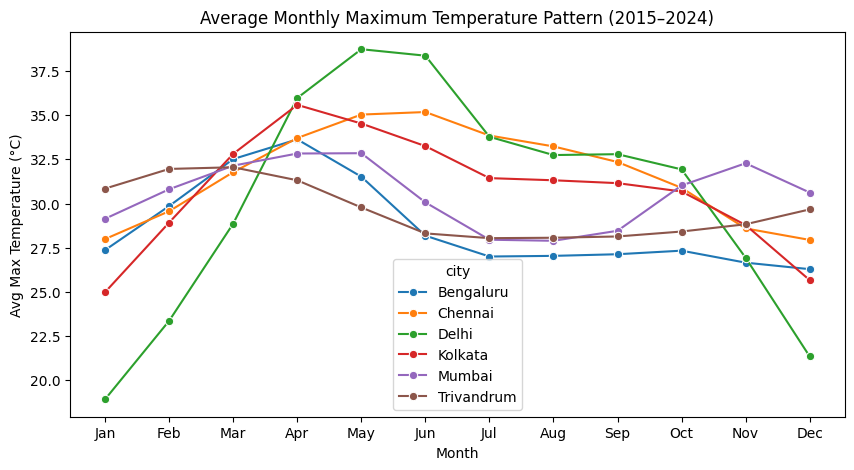

In [19]:
import calendar

monthly['month_name'] = monthly['month'].apply(lambda x: calendar.month_abbr[int(x)])

month_order = list(calendar.month_abbr)[1:]

monthly['month_name'] = pd.Categorical(
    monthly['month_name'],
    categories=month_order,
    ordered=True
)

plt.figure(figsize=(10,5))

sns.lineplot(
    data=monthly.groupby(['month_name','city'], observed=True)['temperature_2m_max'].mean().reset_index(),
    x='month_name',
    y='temperature_2m_max',
    hue='city',
    marker='o'
)

plt.xlabel("Month")
plt.ylabel("Avg Max Temperature (°C)")
plt.title("Average Monthly Maximum Temperature Pattern (2015–2024)")
plt.savefig("plots/monthly_max_temp_pattern.png")
plt.show()


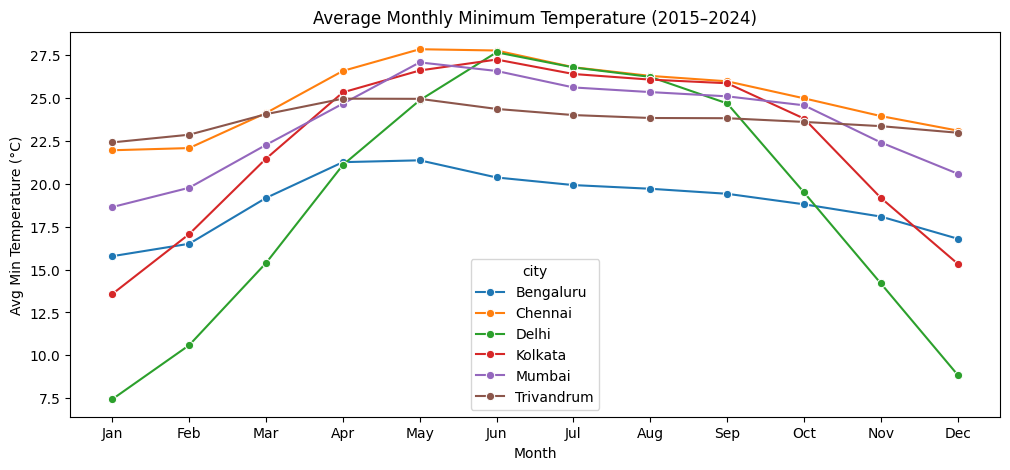

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


monthly_data['month'] = monthly_data['month'].astype(int)
monthly_min_temp = monthly_data.groupby(['city','month'], observed=True)['temperature_2m_min'].mean().reset_index()
month_order = list(calendar.month_abbr)[1:]

plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_min_temp,
    x='month',
    y='temperature_2m_min',
    hue='city',
    marker='o',
    errorbar=None
)
plt.title("Average Monthly Minimum Temperature (2015–2024)")
plt.xlabel("Month")
plt.ylabel("Avg Min Temperature (°C)")
plt.xticks(ticks=range(1,13), labels=month_order)
plt.savefig("plots/monthly_mini_temp_pattern.png")
plt.show()


In [21]:
import pandas as pd
import calendar

monthly['month_name'] = monthly['month'].apply(lambda x: calendar.month_abbr[int(x)])

month_order = list(calendar.month_abbr)[1:]
monthly['month_name'] = pd.Categorical(
    monthly['month_name'],
    categories=month_order,
    ordered=True
)


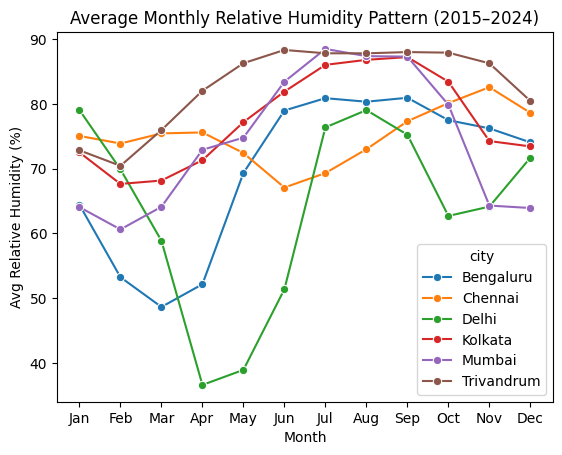

In [22]:
humidity_avg = monthly.groupby(
    ['month_name','city'], observed=True
)['relative_humidity_2m_mean'].mean().reset_index()

sns.lineplot(
    x='month_name',
    y='relative_humidity_2m_mean',
    hue='city',
    data=humidity_avg,
    marker='o',
    errorbar=None
)
plt.xlabel("Month")
plt.ylabel("Avg Relative Humidity (%)")
plt.title("Average Monthly Relative Humidity Pattern (2015–2024)")
plt.savefig("plots/monthly Relative Humidity Pattern.png")
plt.show()


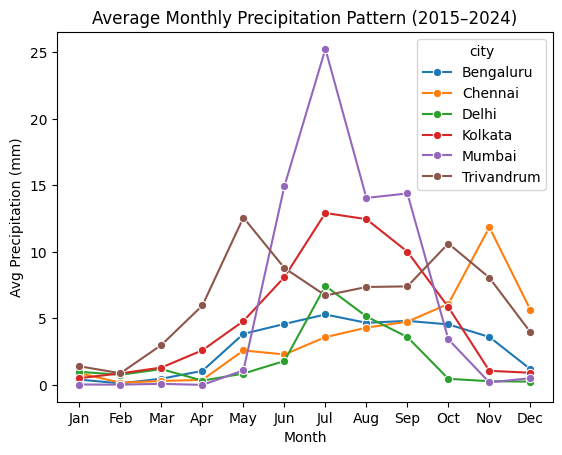

In [23]:
precip_avg = monthly.groupby(['month_name','city'], observed=True)['precipitation_sum'].mean().reset_index()

sns.lineplot(
    data=precip_avg,
    x='month_name',
    y='precipitation_sum',
    hue='city',
    marker='o'
)
plt.xlabel("Month")
plt.ylabel("Avg Precipitation (mm)")
plt.title("Average Monthly Precipitation Pattern (2015–2024)")
plt.savefig("plots/monthly Precipitation Pattern.png")
plt.show()


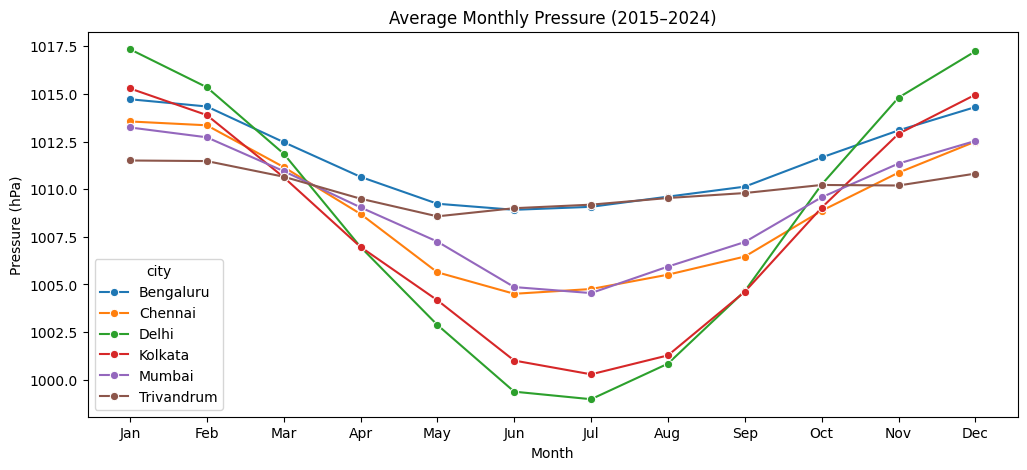

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
monthly_data['month'] = monthly_data['month'].astype(int)
monthly_pressure = monthly_data.groupby(['city','month'], observed=True)['pressure_msl_mean'].mean().reset_index()
month_order = list(calendar.month_abbr)[1:]
plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_pressure,
    x='month',
    y='pressure_msl_mean',
    hue='city',
    marker='o',
    errorbar=None
)
plt.title("Average Monthly Pressure (2015–2024)")
plt.xlabel("Month")
plt.ylabel("Pressure (hPa)")
plt.xticks(ticks=range(1,13), labels=month_order)
plt.savefig("plots/monthly Pressure.png")
plt.show()


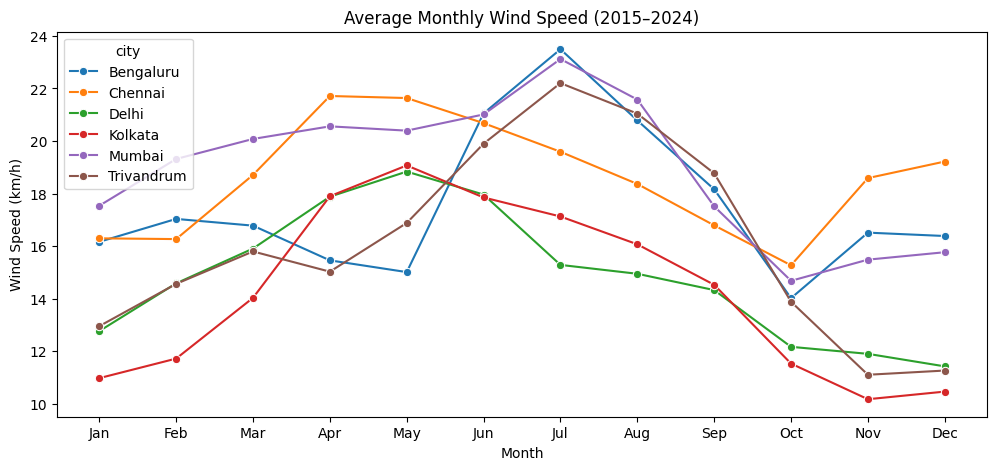

In [25]:
wind_avg = monthly_data.groupby(['month','city'], observed=True)['wind_speed_10m_max'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(
    x='month',
    y='wind_speed_10m_max',
    hue='city',
    data=wind_avg,
    marker='o',
    errorbar=None
)
plt.title("Average Monthly Wind Speed (2015–2024)")
plt.xlabel("Month")
plt.ylabel("Wind Speed (km/h)")
plt.xticks(ticks=range(1,13), labels=month_order)
plt.savefig("plots/monthly Wind Speed.png")
plt.show()


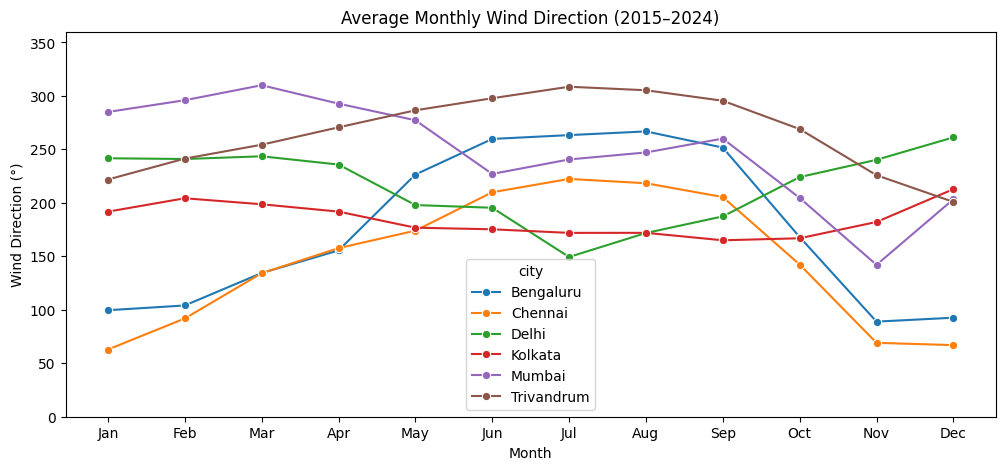

In [26]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

def mean_wind_direction(degrees):
    radians = np.deg2rad(degrees)
    sin_mean = np.mean(np.sin(radians))
    cos_mean = np.mean(np.cos(radians))
    mean_angle = np.rad2deg(np.arctan2(sin_mean, cos_mean))
    return mean_angle % 360

def deg_to_compass(deg):
    dirs = ["N","NE","E","SE","S","SW","W","NW"]
    ix = int((deg + 22.5)//45) % 8
    return dirs[ix]

monthly_avg_year = monthly_data.groupby(['city','year','month'], observed=True)['wind_direction_10m_dominant'].apply(mean_wind_direction).reset_index()
monthly_wind_dir = monthly_avg_year.groupby(['city','month'], observed=True)['wind_direction_10m_dominant'].apply(mean_wind_direction).reset_index()
monthly_wind_dir['wind_dir_compass'] = monthly_wind_dir['wind_direction_10m_dominant'].apply(deg_to_compass)
month_order = list(calendar.month_abbr)[1:]

plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_wind_dir,
    x='month',
    y='wind_direction_10m_dominant',
    hue='city',
    marker='o',
    errorbar=None
)
plt.title("Average Monthly Wind Direction (2015–2024)")
plt.xlabel("Month")
plt.ylabel("Wind Direction (°)")
plt.xticks(ticks=range(1,13), labels=month_order)
plt.ylim(0, 360)
plt.savefig("plots/monthly wind_direction.png", bbox_inches='tight')
plt.show()


##Yearly Weather Trends Across Indian Cities (2015–2024)

This section presents a comparative analysis of year-wise climatic variations across major Indian cities from 2015 to 2024. The following parameters are examined to understand long-term climate behavior and inter-city differences:

* Maximum and minimum temperature
* Precipitation
* Relative humidity
* Wind speed
* Pressure
* Wind direction

The visualizations help in identifying climate change indicators, long-term warming patterns, and abnormal weather conditions across different geographical regions of India.




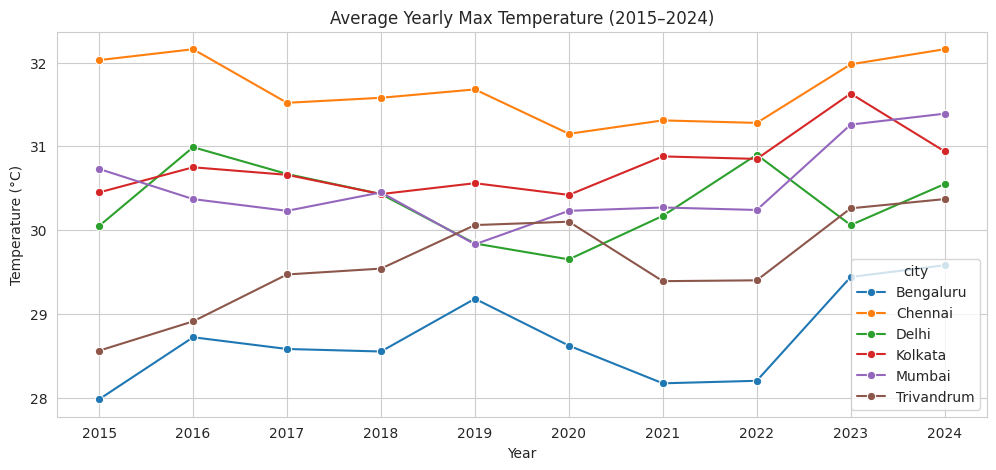

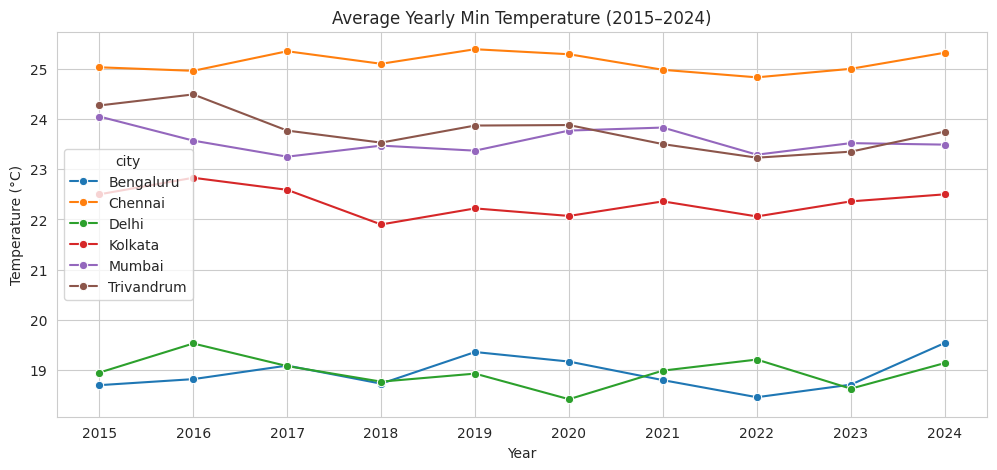

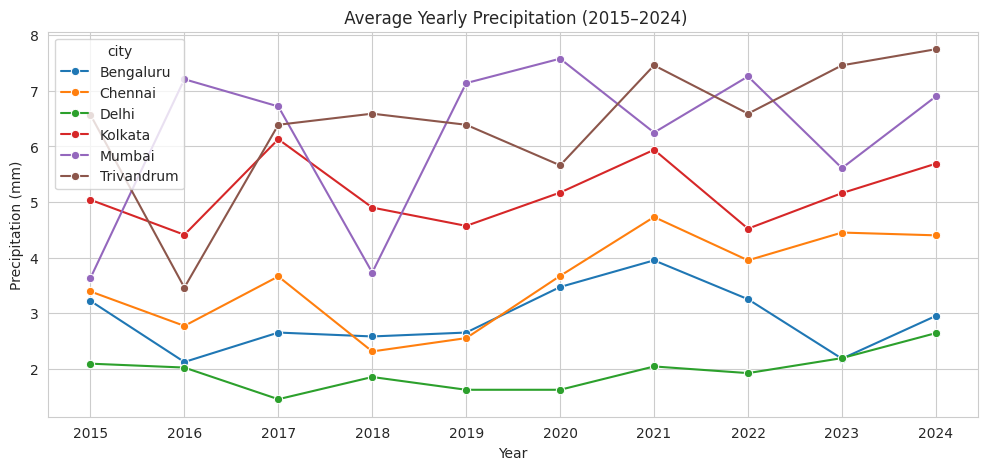

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,5)

years = list(range(2015, 2025))

# Yearly Max Temperature
plt.figure()
sns.lineplot(x='year', y='temperature_2m_max', hue='city',
             data=yearly_data, marker='o', errorbar=None)
plt.title("Average Yearly Max Temperature (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.xticks(years)
plt.savefig("plots/yearly Max Temperature.png")
plt.show()

# Yearly Min Temperature
plt.figure()
sns.lineplot(x='year', y='temperature_2m_min', hue='city',
             data=yearly_data, marker='o', errorbar=None)
plt.title("Average Yearly Min Temperature (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.xticks(years)
plt.savefig("plots/yearly Min Temperature.png")
plt.show()

# Yearly Precipitation
plt.figure()
sns.lineplot(x='year', y='precipitation_sum', hue='city',
             data=yearly_data, marker='o', errorbar=None)
plt.title(" Average Yearly Precipitation (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.xticks(years)
plt.savefig("plots/yearly Precipitation.png")
plt.show()


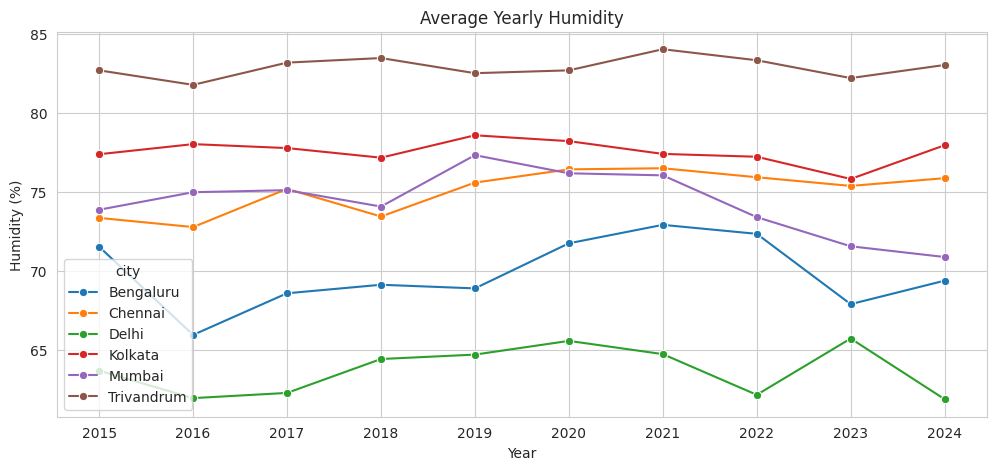

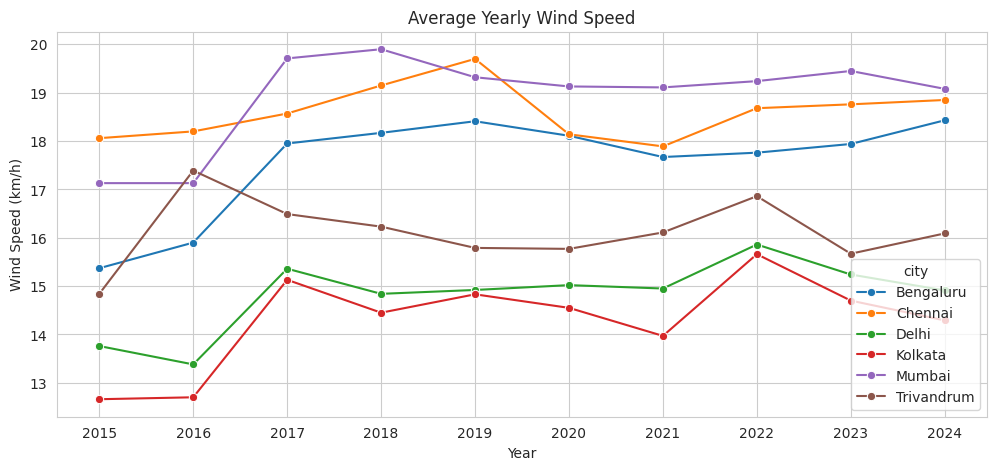

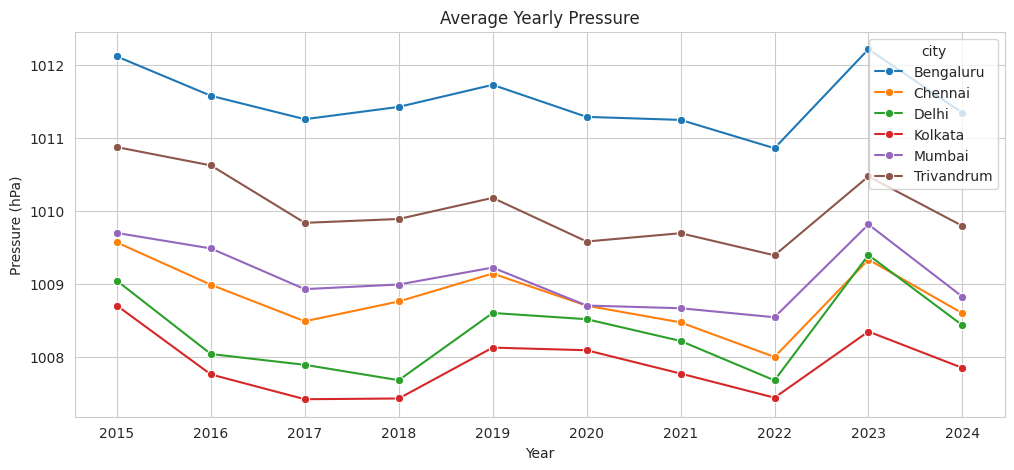

In [28]:
plt.figure()
sns.lineplot(x='year', y='relative_humidity_2m_mean', hue='city',
             data=yearly_data, marker='o', errorbar=None)
plt.title("Average Yearly Humidity")
plt.xlabel("Year")
plt.ylabel("Humidity (%)")
plt.xticks(range(2015, 2025))
plt.savefig("plots/yearly Humidity.png")
plt.show()

plt.figure()
sns.lineplot(x='year', y='wind_speed_10m_max', hue='city',
             data=yearly_data, marker='o', errorbar=None)
plt.title("Average Yearly Wind Speed")
plt.xlabel("Year")
plt.ylabel("Wind Speed (km/h)")
plt.xticks(range(2015, 2025))
plt.savefig("plots/yearly Windspeed.png")
plt.show()

plt.figure()
sns.lineplot(x='year', y='pressure_msl_mean', hue='city',
             data=yearly_data, marker='o', errorbar=None)
plt.title("Average Yearly Pressure")
plt.xlabel("Year")
plt.ylabel("Pressure (hPa)")
plt.xticks(range(2015, 2025))
plt.savefig("plots/yearly Pressure.png")
plt.show()


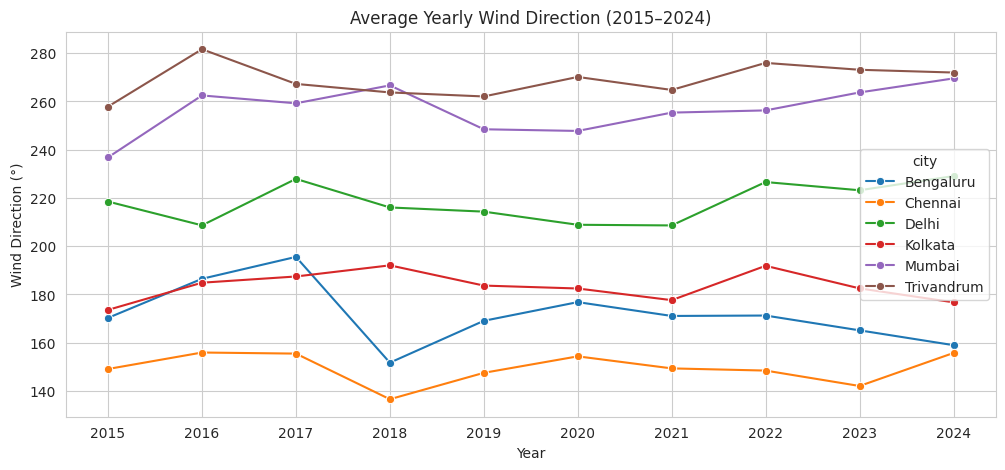

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def mean_wind_direction(deg):
    rad = np.deg2rad(deg)
    sin_mean = np.mean(np.sin(rad))
    cos_mean = np.mean(np.cos(rad))
    angle = np.rad2deg(np.arctan2(sin_mean, cos_mean))
    return angle % 360
yearly_wind_dir = (
    monthly_data
    .groupby(['city','year'])['wind_direction_10m_dominant']
    .apply(mean_wind_direction)
    .reset_index()
)
plt.figure(figsize=(12,5))

sns.lineplot(
    x='year',
    y='wind_direction_10m_dominant',
    hue='city',
    data=yearly_wind_dir,
    marker='o',
    errorbar=None
)

plt.title("Average Yearly Wind Direction (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Wind Direction (°)")
plt.xticks(range(2015, 2025))
plt.savefig("plots/yearly Wind_direction.png")
plt.show()


##City-wise Weather Comparison for the Year 2020

This section presents a comparative study of major weather parameters across selected Indian cities for the year 2020. The analysis focuses on understanding how climatic conditions vary geographically within the same year.

Parameters analyzed:

- Average maximum temperature

- Total annual precipitation

- Average relative humidity

- Average wind speed

- Average wind direction

These comparisons help in highlighting climatic diversity and identifying regional weather patterns across India.

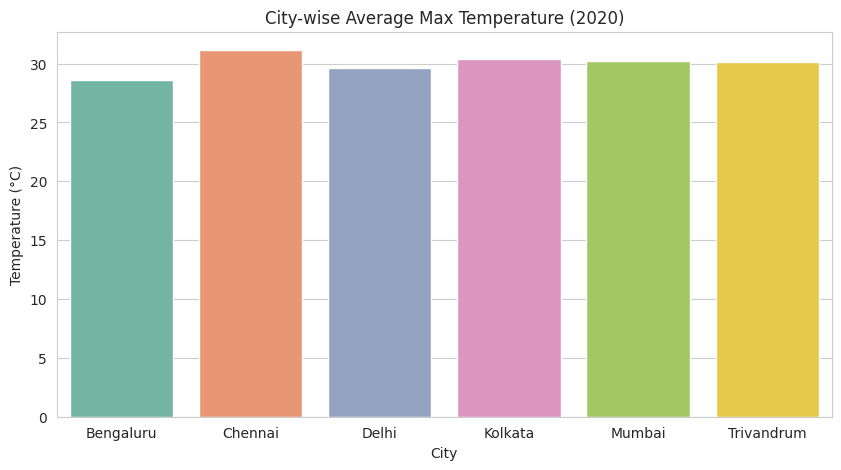

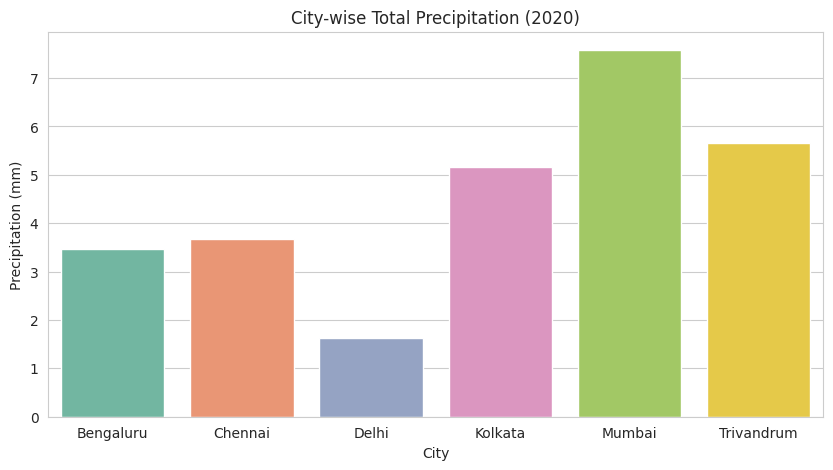

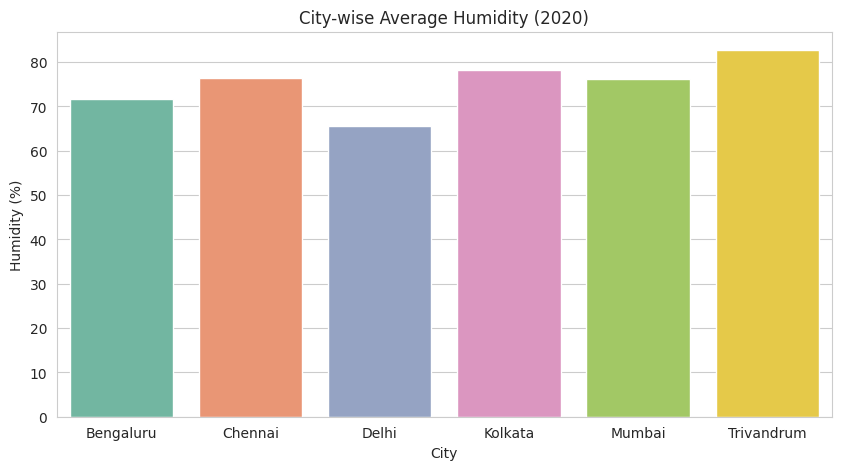

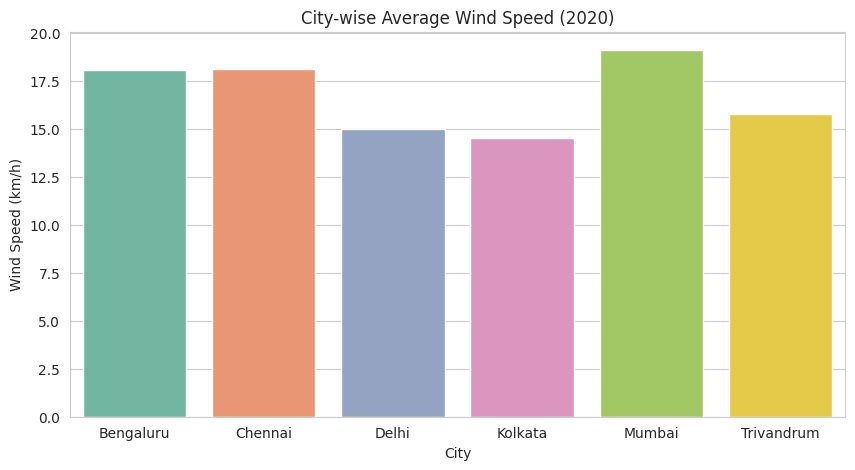

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_year = 2020
city_2020 = yearly_data[yearly_data['year'] == selected_year]

palette = sns.color_palette("Set2", n_colors=city_2020['city'].nunique())

# Max Temperature
plt.figure(figsize=(10,5))
sns.barplot(x='city', y='temperature_2m_max', hue='city',
            data=city_2020, palette=palette, legend=False)
plt.title("City-wise Average Max Temperature (2020)")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.savefig("plots/citywise_max_temp_2020.png", dpi=300, bbox_inches="tight")
plt.show()

# Rainfall
plt.figure(figsize=(10,5))
sns.barplot(x='city', y='precipitation_sum', hue='city',
            data=city_2020, palette=palette, legend=False)
plt.title("City-wise Total Precipitation (2020)")
plt.xlabel("City")
plt.ylabel("Precipitation (mm)")
plt.savefig("plots/citywise_precipitation_2020.png", dpi=300, bbox_inches="tight")
plt.show()

#  Humidity
plt.figure(figsize=(10,5))
sns.barplot(x='city', y='relative_humidity_2m_mean', hue='city',
            data=city_2020, palette=palette, legend=False)
plt.title("City-wise Average Humidity (2020)")
plt.xlabel("City")
plt.ylabel("Humidity (%)")
plt.savefig("plots/citywise_humidity_2020.png", dpi=300, bbox_inches="tight")
plt.show()

#  Wind Speed
plt.figure(figsize=(10,5))
sns.barplot(x='city', y='wind_speed_10m_max', hue='city',
            data=city_2020, palette=palette, legend=False)
plt.title("City-wise Average Wind Speed (2020)")
plt.xlabel("City")
plt.ylabel("Wind Speed (km/h)")
plt.savefig("plots/citywise_windspeed_2020.png", dpi=300, bbox_inches="tight")
plt.show()


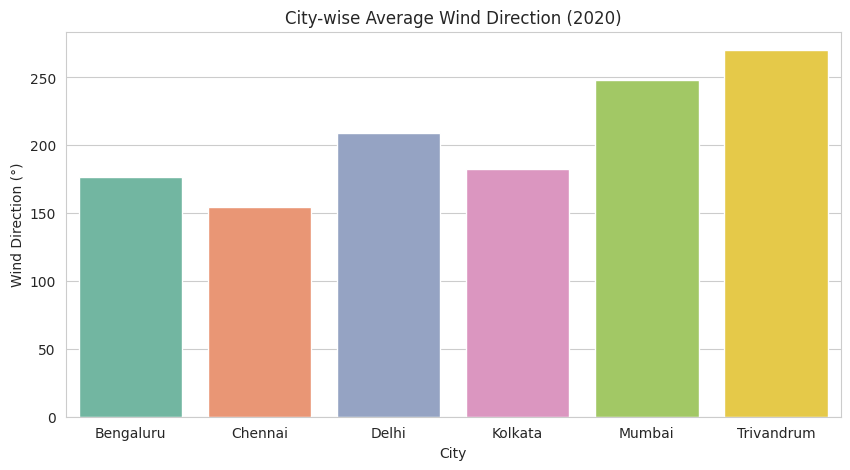

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def mean_wind_direction(deg):
    rad = np.deg2rad(deg)
    sin_mean = np.mean(np.sin(rad))
    cos_mean = np.mean(np.cos(rad))
    angle = np.rad2deg(np.arctan2(sin_mean, cos_mean))
    return angle % 360

# wind direction
winddir_2020 = (
    monthly_data[monthly_data['year'] == 2020]
    .groupby('city')['wind_direction_10m_dominant']
    .apply(mean_wind_direction)
    .reset_index()
)

palette = sns.color_palette("Set2", n_colors=winddir_2020['city'].nunique())

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='city', y='wind_direction_10m_dominant', hue='city',
            data=winddir_2020, palette=palette, legend=False)
plt.title("City-wise Average Wind Direction (2020)")
plt.xlabel("City")
plt.ylabel("Wind Direction (°)")
plt.savefig("plots/citywise_wind_direction_2020.png", dpi=300, bbox_inches="tight")
plt.show()


##Seasonal Weather Analysis Across Indian Cities

Indian climate patterns are best interpreted using season-wise analysis rather than only monthly trends. In this section, weather data is grouped into four major Indian seasons:

Season and Months

Winter       December – February

Summer	         March – May

Monsoon	         June – September

Post-Monsoon	   October – November

For each city, the dataset is aggregated season-wise to compute the average values of:

- Maximum and Minimum Temperature

- Relative Humidity

- Pressure

- Wind Speed

- Wind Direction

- Total Precipitation

This seasonal analysis provides a clearer understanding of how climatic conditions vary across different regions of India throughout the year.

In [32]:
import pandas as pd
import os

os.makedirs("data", exist_ok=True)

# CREATE SEASON COLUMN
def get_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8,9]:
        return "Monsoon"
    else:
        return "Post-Monsoon"

monthly_data['season'] = monthly_data['month'].apply(get_season)

# SEASONAL AGGREGATION
weather_cols = [
    'temperature_2m_max',
    'temperature_2m_min',
    'relative_humidity_2m_mean',
    'pressure_msl_mean',
    'wind_speed_10m_max',
    'precipitation_sum',
    'wind_direction_10m_dominant'
]

seasonal_data = (
    monthly_data
    .groupby(['city','season'])[weather_cols]
    .mean()
    .round(2)
    .reset_index()
)

# SAVE FILE
seasonal_data.to_csv("data/seasonal_weather.csv", index=False)

print("Seasonal aggregated dataset saved as data/seasonal_weather.csv")


Seasonal aggregated dataset saved as data/seasonal_weather.csv


In [ ]:
seasonal_data.head()

city        season  temperature_2m_max  temperature_2m_min  \
0  Bengaluru       Monsoon               27.34               19.85   
1  Bengaluru  Post-Monsoon               27.00               18.44   
2  Bengaluru        Summer               32.56               20.60   
3  Bengaluru        Winter               27.84               16.36   
4    Chennai       Monsoon               33.65               26.70   

   relative_humidity_2m_mean  pressure_msl_mean  wind_speed_10m_max  \
0                      80.30            1009.44               20.87   
1                      76.86            1012.38               15.26   
2                      56.70            1010.79               15.75   
3                      63.91            1014.46               16.53   
4                      71.68            1005.31               18.86   

   precipitation_sum  wind_direction_10m_dominant  
0               4.85                       260.36  
1               4.08                       129.16  
2               1.79                       172.05  
3               0.58                        98.75  
4               3.74                       213.98

## Seasonal Weather Patterns Across Indian Cities

This section analyzes how major weather parameters vary across the four primary Indian seasons Winter, Summer, Monsoon and Post-Monsoon for all selected cities.

The following season-wise comparisons are visualized:

- Average Maximum Temperature

- Average Minimum Temperature

- Average Precipitation

- Average Relative Humidity

- Average Wind Speed

- Average Wind Direction

These bar charts clearly highlight how climatic behavior changes across different regions of India depending on the season.

Seasonal analysis provides better insight than monthly data alone and is essential for understanding India’s diverse climate patterns.


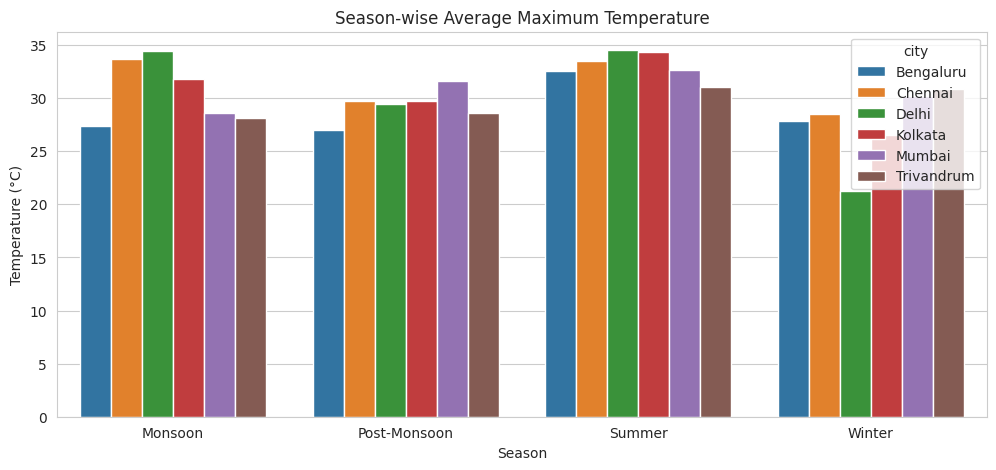

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.barplot(x='season', y='temperature_2m_max', hue='city', data=seasonal_data)
plt.title("Season-wise Average Maximum Temperature")
plt.xlabel("Season")
plt.ylabel("Temperature (°C)")
plt.savefig("plots/seasonal_max_temperature.png", dpi=300, bbox_inches="tight")
plt.show()


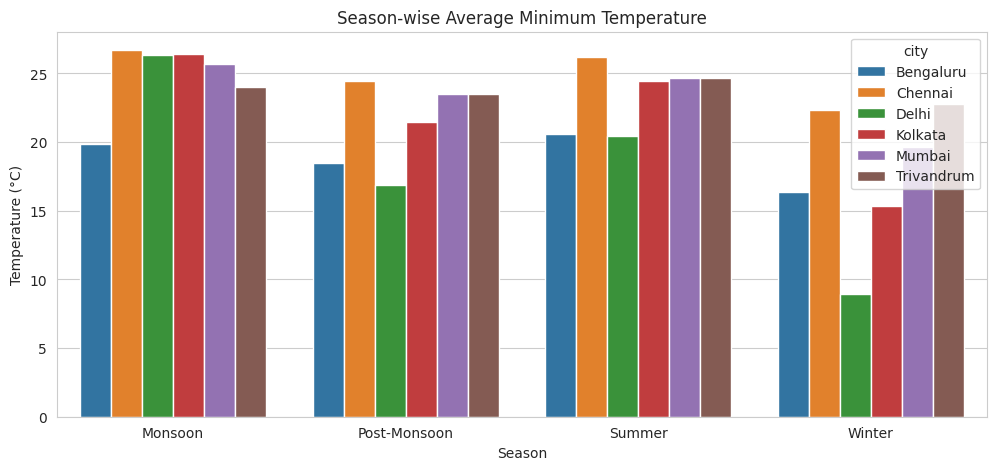

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(x='season', y='temperature_2m_min', hue='city', data=seasonal_data)
plt.title("Season-wise Average Minimum Temperature")
plt.xlabel("Season")
plt.ylabel("Temperature (°C)")
plt.savefig("plots/seasonal_min_temperature.png", dpi=300, bbox_inches="tight")
plt.show()


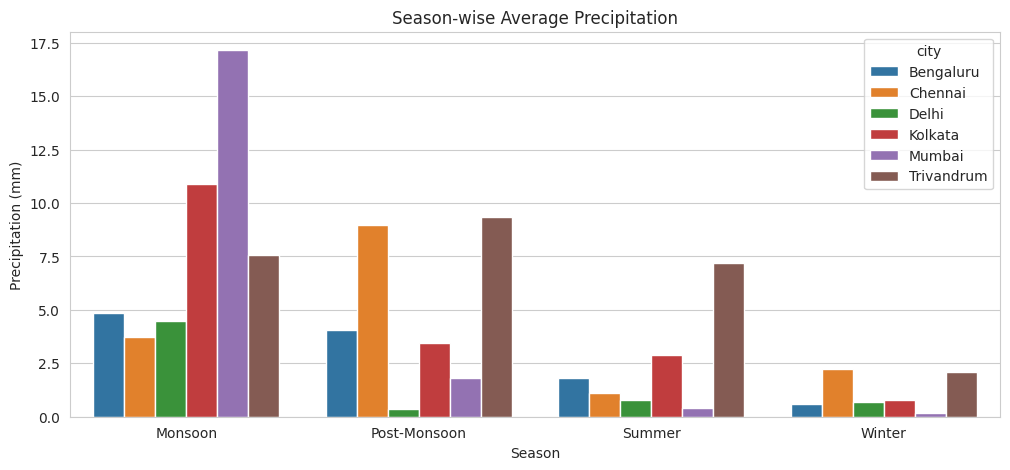

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(x='season', y='precipitation_sum', hue='city', data=seasonal_data)
plt.title("Season-wise Average Precipitation")
plt.xlabel("Season")
plt.ylabel("Precipitation (mm)")
plt.savefig("plots/seasonal_precipitation.png", dpi=300, bbox_inches="tight")
plt.show()


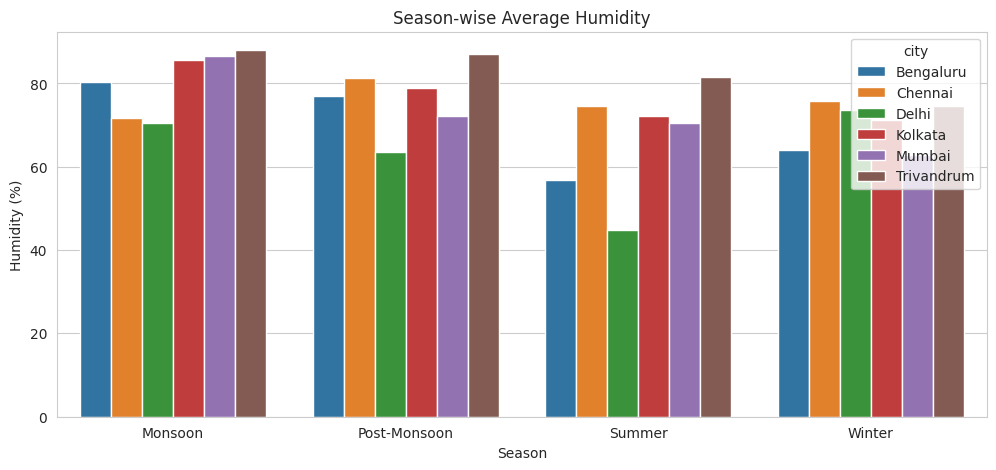

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(x='season', y='relative_humidity_2m_mean', hue='city', data=seasonal_data)
plt.title("Season-wise Average Humidity")
plt.xlabel("Season")
plt.ylabel("Humidity (%)")
plt.savefig("plots/seasonal_humidity.png", dpi=300, bbox_inches="tight")
plt.show()


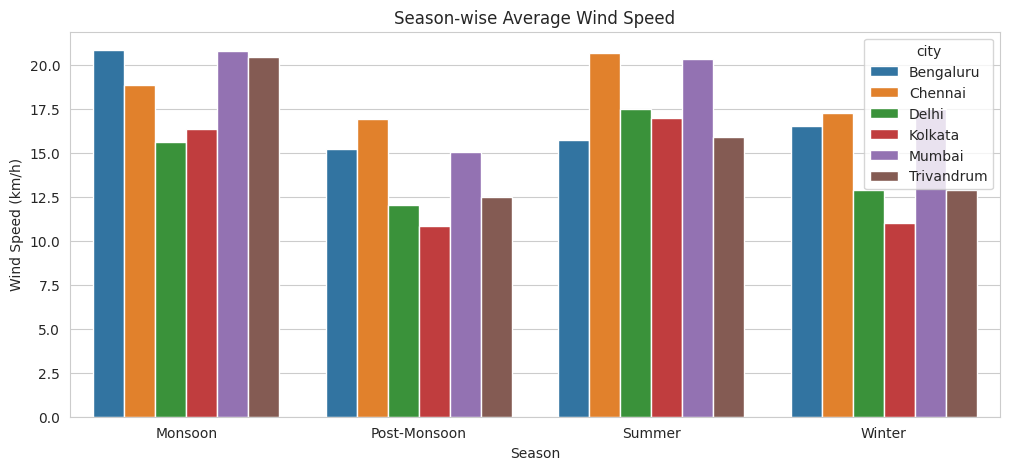

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(x='season', y='wind_speed_10m_max', hue='city', data=seasonal_data)
plt.title("Season-wise Average Wind Speed")
plt.xlabel("Season")
plt.ylabel("Wind Speed (km/h)")
plt.savefig("plots/seasonal_wind_speed.png", dpi=300, bbox_inches="tight")
plt.show()


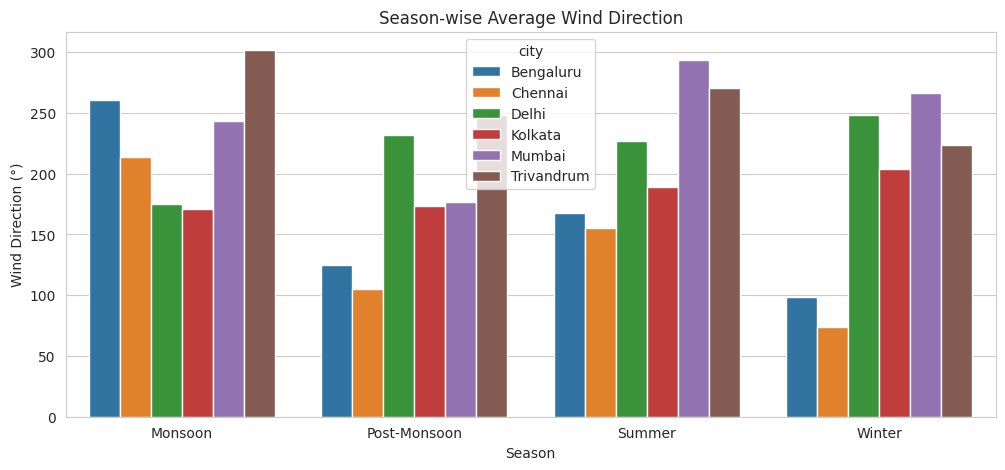

In [38]:
import numpy as np

def mean_wind_direction(deg):
    rad = np.deg2rad(deg)
    sin_mean = np.mean(np.sin(rad))
    cos_mean = np.mean(np.cos(rad))
    return np.rad2deg(np.arctan2(sin_mean, cos_mean)) % 360

seasonal_wind_dir = (
    monthly_data.groupby(['city','season'])['wind_direction_10m_dominant']
    .apply(mean_wind_direction)
    .reset_index()
)

plt.figure(figsize=(12,5))
sns.barplot(x='season', y='wind_direction_10m_dominant', hue='city',
            data=seasonal_wind_dir)
plt.title("Season-wise Average Wind Direction")
plt.xlabel("Season")
plt.ylabel("Wind Direction (°)")
plt.savefig("plots/seasonal_wind_direction.png", dpi=300, bbox_inches="tight")
plt.show()


##Correlation Analysis Between Weather Parameters

This section examines the relationship between key weather variables using a correlation heatmap.

The following parameters are included:

- Maximum Temperature

- Minimum Temperature

- Relative Humidity

- Atmospheric Pressure

- Precipitation

- Wind Speed

- Wind Direction

Correlation values range between -1 and +1:

+1 → Strong positive relationship

-1 → Strong negative relationship

0 → No relationship

This analysis helps in identifying important climatic dependencies such as the inverse relationship between temperature and pressure, and the impact of monsoon precipitation on humidity levels.


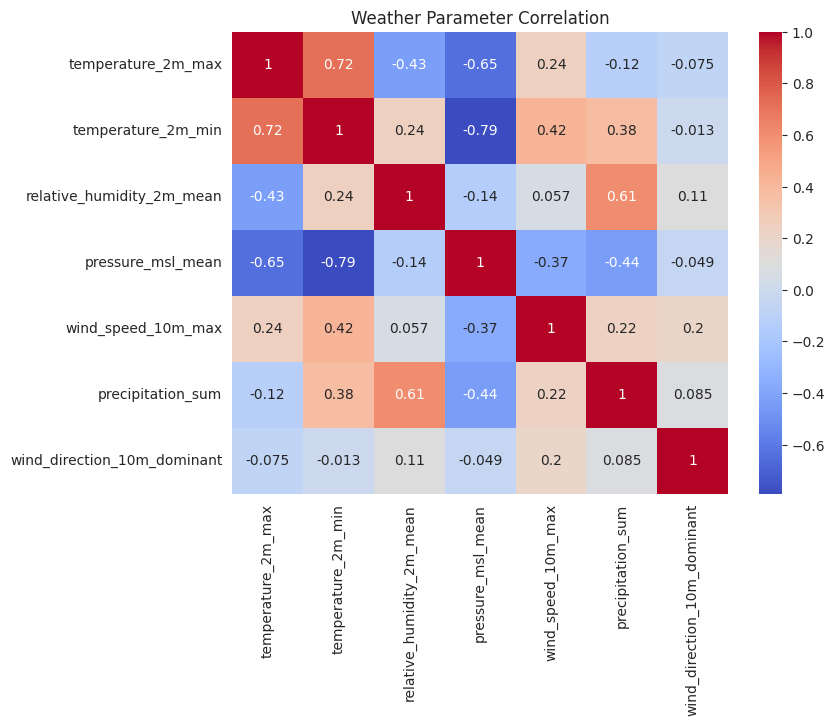

In [39]:
import seaborn as sns

corr = monthly_data[['temperature_2m_max','temperature_2m_min',
                      'relative_humidity_2m_mean','pressure_msl_mean',
                      'wind_speed_10m_max','precipitation_sum','wind_direction_10m_dominant']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Weather Parameter Correlation")
plt.savefig("plots/weather parameter correlation.png")
plt.show()


In [40]:
import os
os.makedirs("final_outputs", exist_ok=True)

monthly_data.to_csv("final_outputs/monthly_weather.csv", index=False)
yearly_data.to_csv("final_outputs/yearly_weather.csv", index=False)
seasonal_data.to_csv("final_outputs/seasonal_weather.csv", index=False)

print("Final datasets exported successfully.")


Final datasets exported successfully.


##Monthly Weather Trend Heatmap Analysis (2015–2024)

Monthly heatmaps were used to analyze long-term seasonal variations of temperature, humidity, pressure, wind speed, precipitation and wind direction across major Indian cities.

##Maximum Temperature

Peak temperatures are observed during April–May, indicating summer heat waves.

Inland cities show sharper temperature peaks compared to coastal cities.

##Minimum Temperature

Lowest temperatures occur during December–January.

Northern cities experience colder winters than southern cities.

##Humidity

Humidity is highest during the monsoon season (June–September).

Coastal cities remain humid throughout the year.

##Pressure

Pressure decreases during monsoon months and increases in winter.

##Wind Speed

Wind speed peaks during the monsoon season, especially in coastal regions.

##Precipitation

Heavy rainfall is observed from June to September.

Mumbai and Trivandrum receive the highest annual rainfall.

##Wind Direction

A significant seasonal shift in wind direction is observed during monsoon onset, confirming the Indian monsoon circulation pattern.

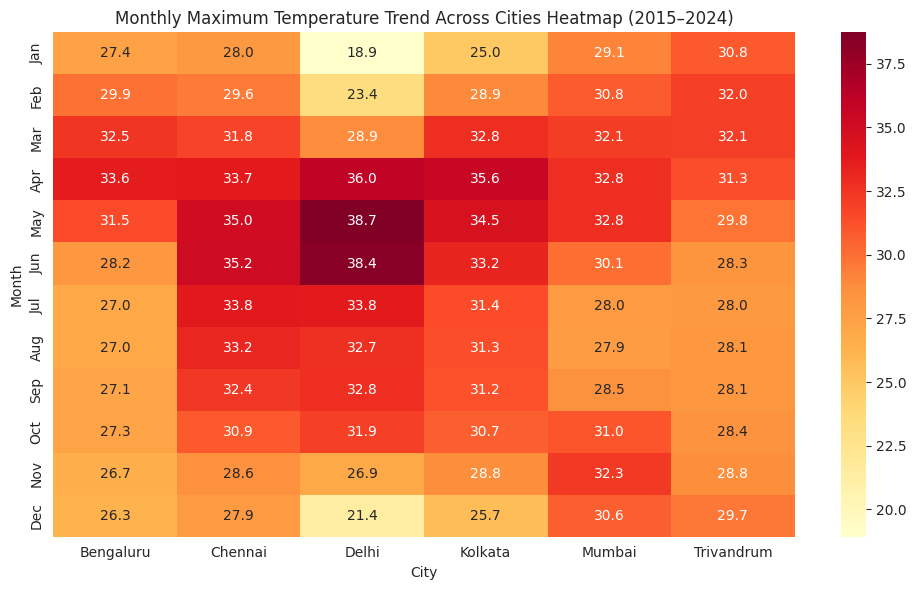

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
monthly_data['month_name'] = monthly_data['month'].apply(lambda x: calendar.month_abbr[int(x)])

temp_heatmap = monthly_data.pivot_table(
    index='month_name',
    columns='city',
    values='temperature_2m_max',
    aggfunc='mean'
)
month_order = [calendar.month_abbr[i] for i in range(1,13)]
temp_heatmap = temp_heatmap.reindex(month_order)
plt.figure(figsize=(10,6))
sns.heatmap(temp_heatmap, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Monthly Maximum Temperature Trend Across Cities Heatmap (2015–2024)")
plt.xlabel("City")
plt.ylabel("Month")
plt.tight_layout()
plt.savefig("plots/monthly_max_temperature_heatmap.png", dpi=300)
plt.show()


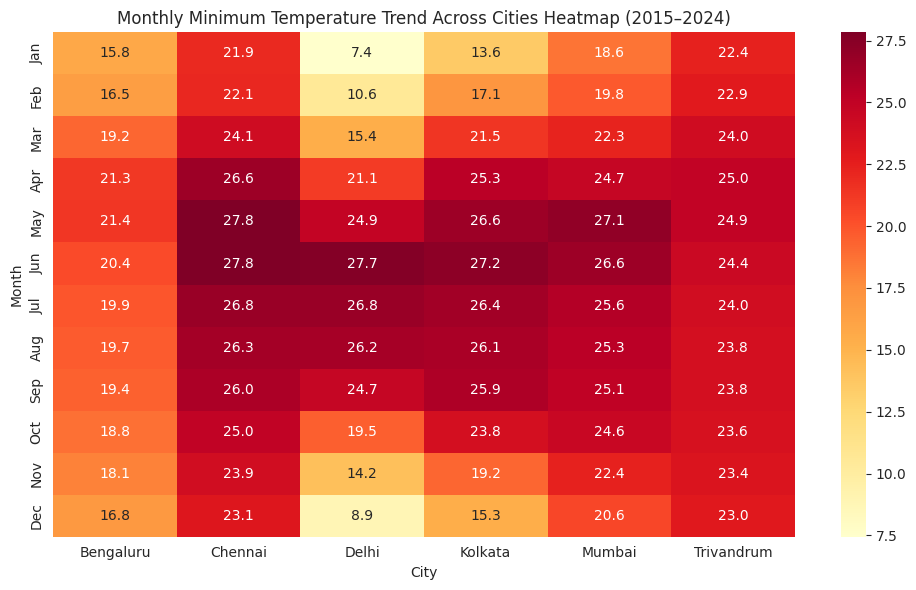

In [45]:
min_temp_heatmap = monthly_data.pivot_table(
    index='month_name',
    columns='city',
    values='temperature_2m_min',
    aggfunc='mean'
)
min_temp_heatmap = min_temp_heatmap.reindex(month_order)
plt.figure(figsize=(10,6))
sns.heatmap(min_temp_heatmap, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Monthly Minimum Temperature Trend Across Cities Heatmap (2015–2024)")
plt.xlabel("City")
plt.ylabel("Month")
plt.tight_layout()
plt.savefig("plots/monthly_min_temperature_heatmap.png", dpi=300)
plt.show()


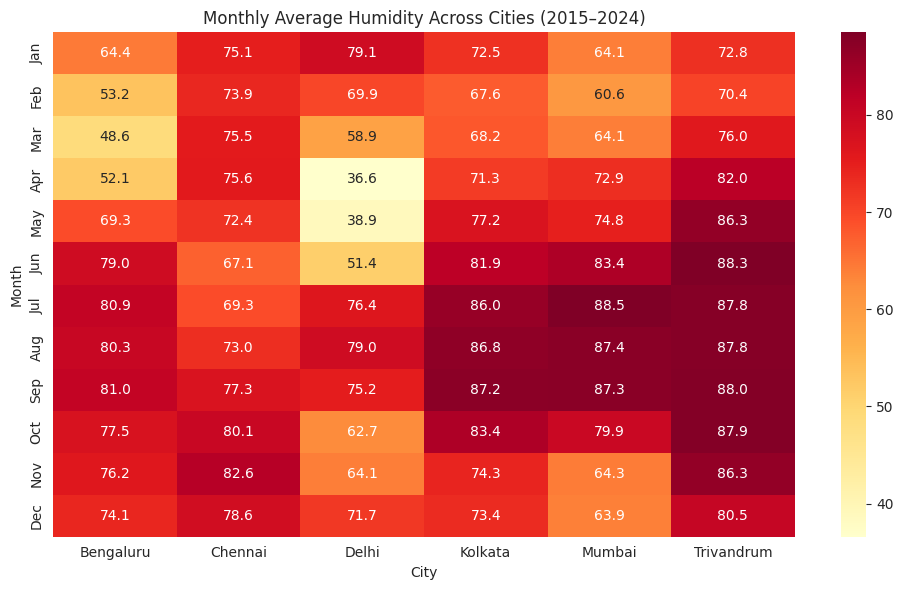

In [46]:
humidity_heatmap = monthly_data.pivot_table(
    index='month_name',
    columns='city',
    values='relative_humidity_2m_mean',
    aggfunc='mean'
).reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(humidity_heatmap, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Monthly Average Humidity Across Cities (2015–2024)")
plt.xlabel("City")
plt.ylabel("Month")
plt.tight_layout()
plt.savefig("plots/monthly_Humidity_heatmap.png", dpi=300)
plt.show()


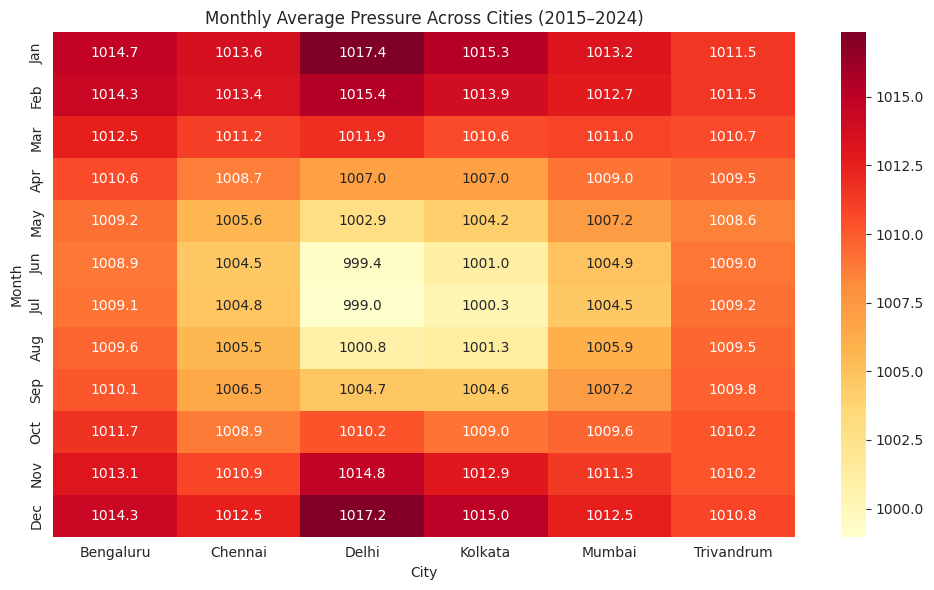

In [47]:
pressure_heatmap = monthly_data.pivot_table(
    index='month_name',
    columns='city',
    values='pressure_msl_mean',
    aggfunc='mean'
).reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(pressure_heatmap, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Monthly Average Pressure Across Cities (2015–2024)")
plt.xlabel("City")
plt.ylabel("Month")
plt.tight_layout()
plt.savefig("plots/monthly_Pressure_heatmap.png", dpi=300)
plt.show()


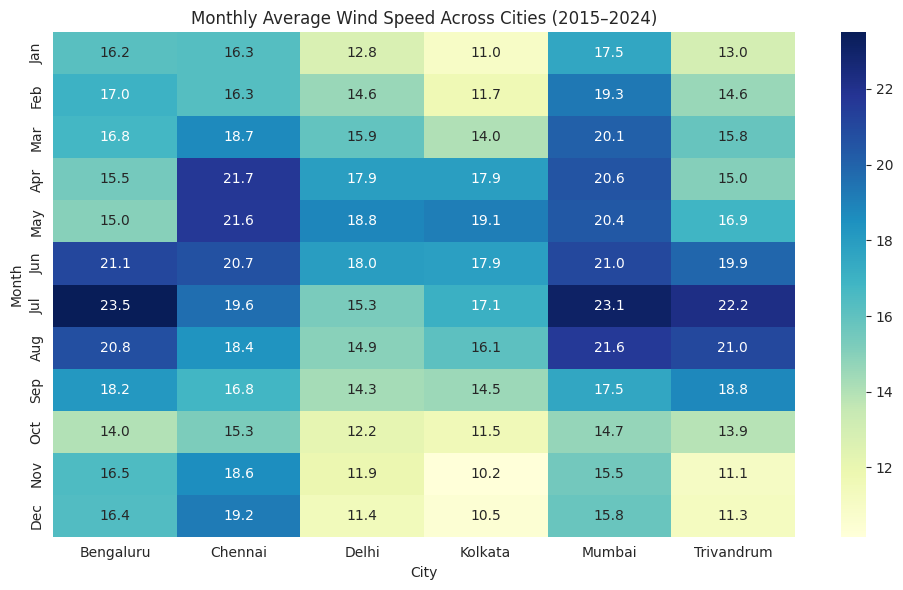

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
monthly_data['month_name'] = monthly_data['month'].apply(lambda x: calendar.month_abbr[int(x)])
month_order = [calendar.month_abbr[i] for i in range(1,13)]
wind_heatmap = monthly_data.pivot_table(
    index='month_name',
    columns='city',
    values='wind_speed_10m_max',
    aggfunc='mean'
).reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(wind_heatmap, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Monthly Average Wind Speed Across Cities (2015–2024)")
plt.xlabel("City")
plt.ylabel("Month")
plt.tight_layout()
plt.savefig("plots/monthly_windspeed_heatmap.png", dpi=300)
plt.show()


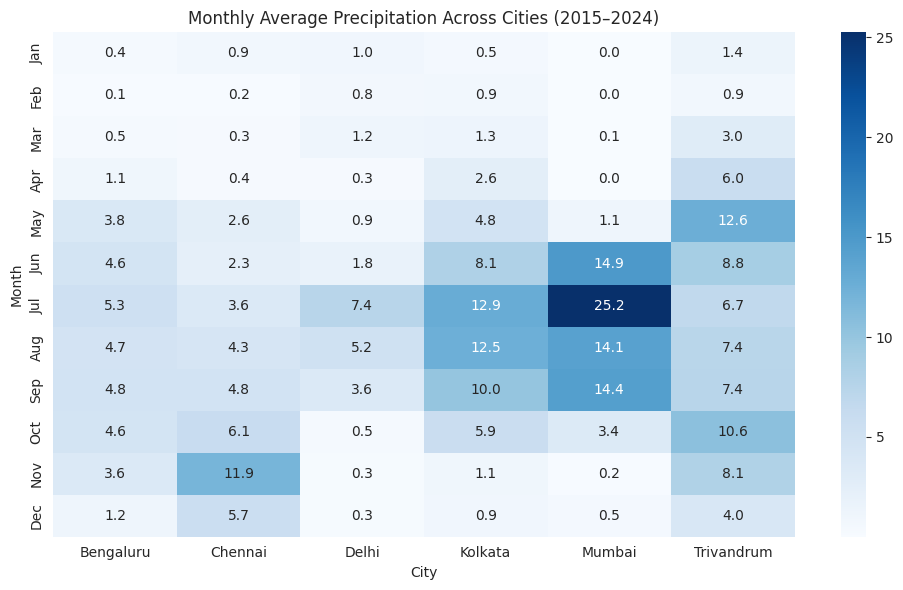

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
monthly_data['month_name'] = monthly_data['month'].apply(lambda x: calendar.month_abbr[int(x)])
month_order = [calendar.month_abbr[i] for i in range(1,13)]
precip_heatmap = monthly_data.pivot_table(
    index='month_name',
    columns='city',
    values='precipitation_sum',
    aggfunc='mean'
).reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(precip_heatmap, annot=True, cmap="Blues", fmt=".1f")
plt.title("Monthly Average Precipitation Across Cities (2015–2024)")
plt.xlabel("City")
plt.ylabel("Month")
plt.tight_layout()
plt.savefig("plots/monthly_Precipitation_heatmap.png", dpi=300)
plt.show()


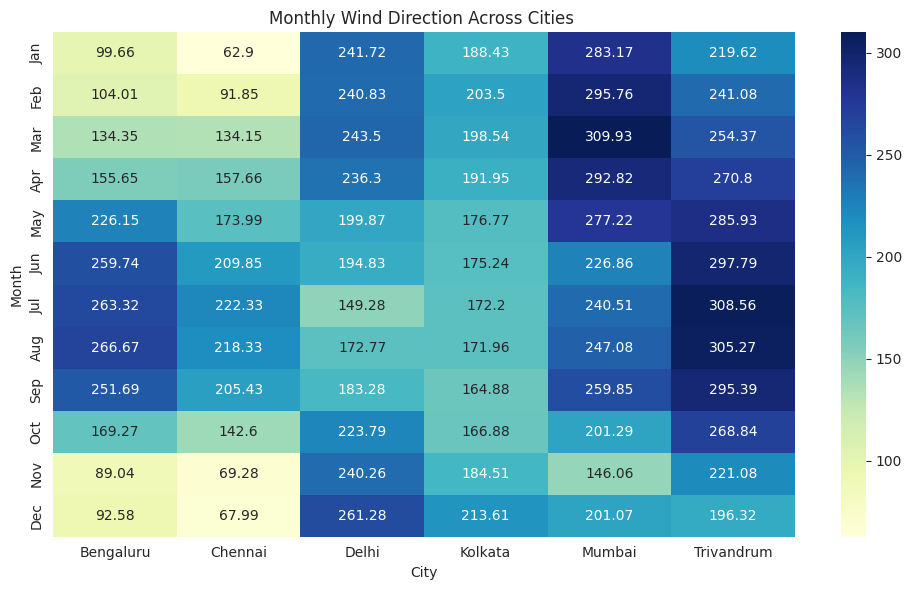

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import numpy as np
monthly_data['wind_direction_10m_dominant'] = monthly_data['wind_direction_10m_dominant'].round(2)
monthly_data['month_name'] = monthly_data['month'].apply(lambda x: calendar.month_abbr[int(x)])
month_order = [calendar.month_abbr[i] for i in range(1,13)]
wind_dir_heatmap = monthly_data.pivot_table(
    index='month_name',
    columns='city',
    values='wind_direction_10m_dominant',
    aggfunc='mean'
).reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(
    wind_dir_heatmap,
    annot=wind_dir_heatmap.round(2),
    fmt='',
    cmap='YlGnBu',
    cbar=True
)
plt.title("Monthly Wind Direction Across Cities ")
plt.xlabel("City")
plt.ylabel("Month")
plt.tight_layout()
plt.savefig("plots/monthly_Wind direction_heatmap.png", dpi=300)
plt.show()


##Year-wise Weather Heatmap Analysis (2015–2024)

Year-wise heatmaps were generated to study long-term climate behavior and inter-annual variations across Indian cities.

##Temperature

Both maximum and minimum temperatures show a gradual rise after 2020, indicating warming trends.

Inland cities remain hotter, while coastal cities exhibit more stable temperature patterns.

##Humidity

Coastal cities remain highly humid throughout the years.

Inland cities show significant year-to-year variability in humidity.

##Precipitation

Rainfall varies significantly depending on monsoon strength.

Mumbai and Trivandrum consistently record the highest rainfall.

##Wind Speed

Stronger winds are observed in coastal regions.

Wind speeds peak during years with intense monsoon activity.

##Wind Direction

Dominant wind directions remain largely consistent every year, confirming stable monsoon circulation patterns.

##Pressure

Lower atmospheric pressure is observed during strong monsoon years.

Seasonal pressure cycles remain stable across the decade.

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

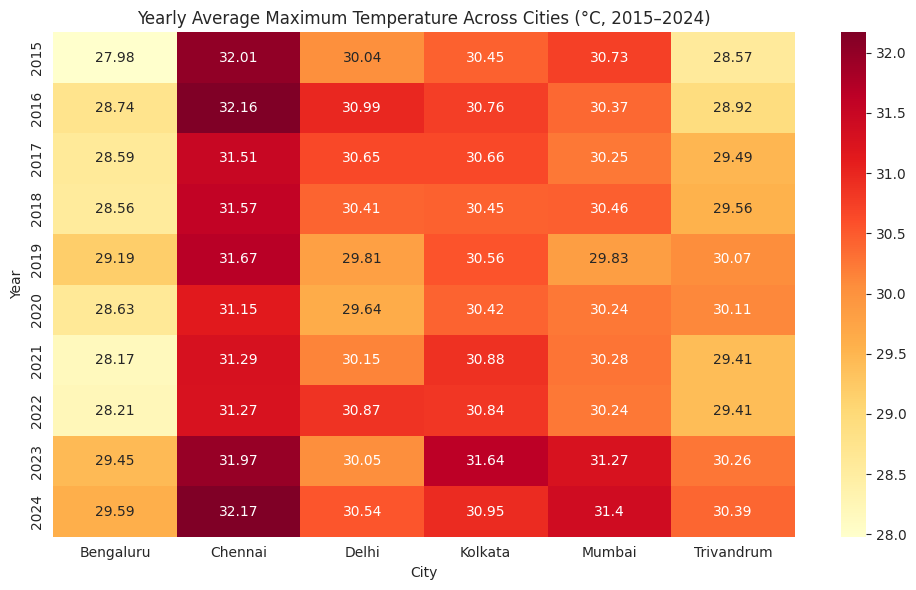

In [55]:
yearly_max_temp = monthly_data.groupby(['year','city'])['temperature_2m_max'].mean().reset_index()
yearly_max_temp_pivot = yearly_max_temp.pivot(index='year', columns='city', values='temperature_2m_max')

plt.figure(figsize=(10,6))
sns.heatmap(
    yearly_max_temp_pivot.round(2),
    annot=True,
    fmt='',
    cmap='YlOrRd',
    cbar=True
)
plt.title("Yearly Average Maximum Temperature Across Cities (°C, 2015–2024)")
plt.xlabel("City")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


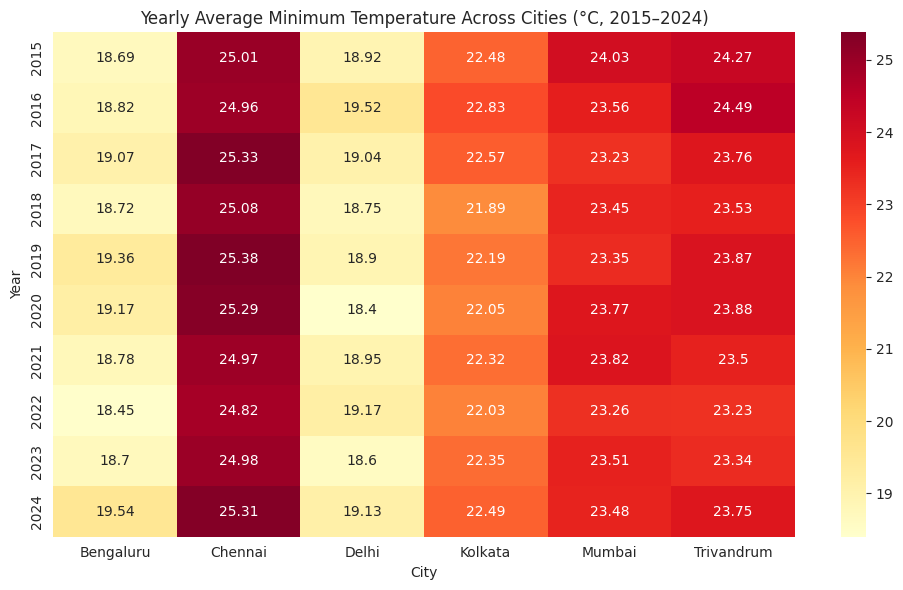

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
yearly_min_temp = monthly_data.groupby(['year','city'])['temperature_2m_min'].mean().reset_index()
yearly_min_temp_pivot = yearly_min_temp.pivot(index='year', columns='city', values='temperature_2m_min')
plt.figure(figsize=(10,6))
sns.heatmap(
    yearly_min_temp_pivot.round(2),
    annot=True,
    fmt='',
    cmap='YlOrRd',
    cbar=True
)
plt.title("Yearly Average Minimum Temperature Across Cities (°C, 2015–2024)")
plt.xlabel("City")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


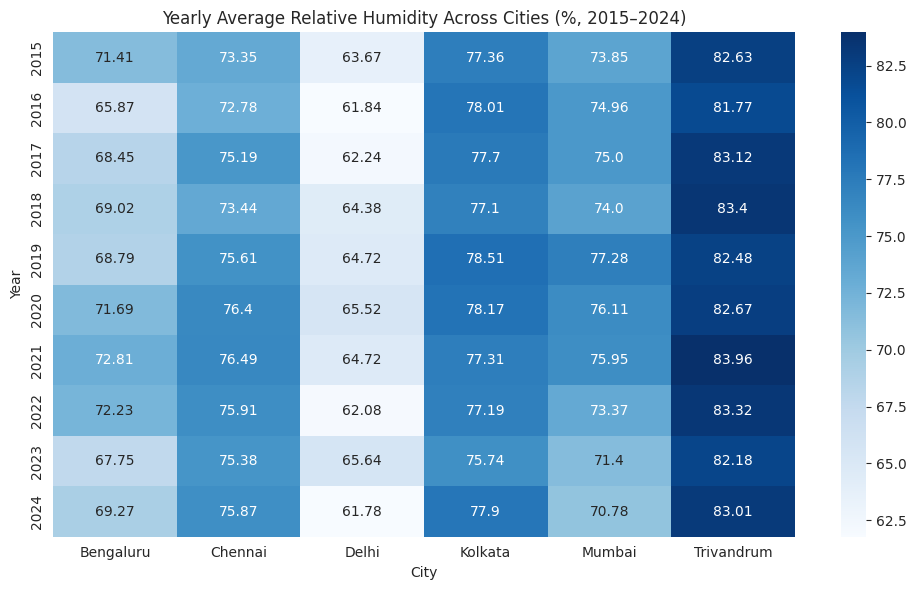

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
yearly_humidity = monthly_data.groupby(['year','city'])['relative_humidity_2m_mean'].mean().reset_index()
yearly_humidity_pivot = yearly_humidity.pivot(index='year', columns='city', values='relative_humidity_2m_mean')

plt.figure(figsize=(10,6))
sns.heatmap(
    yearly_humidity_pivot.round(2),
    annot=True,
    fmt='',
    cmap='Blues',
    cbar=True
)
plt.title("Yearly Average Relative Humidity Across Cities (%, 2015–2024)")
plt.xlabel("City")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


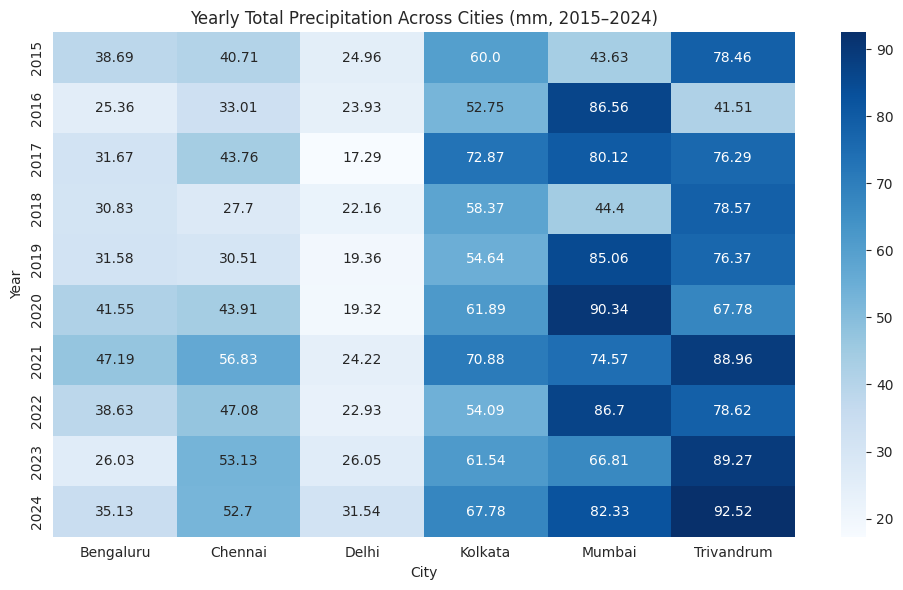

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
yearly_precip = monthly_data.groupby(['year','city'])['precipitation_sum'].sum().reset_index()
yearly_precip_pivot = yearly_precip.pivot(index='year', columns='city', values='precipitation_sum')

plt.figure(figsize=(10,6))
sns.heatmap(
    yearly_precip_pivot.round(2),
    annot=True,
    fmt='',
    cmap='Blues',
    cbar=True
)
plt.title("Yearly Total Precipitation Across Cities (mm, 2015–2024)")
plt.xlabel("City")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


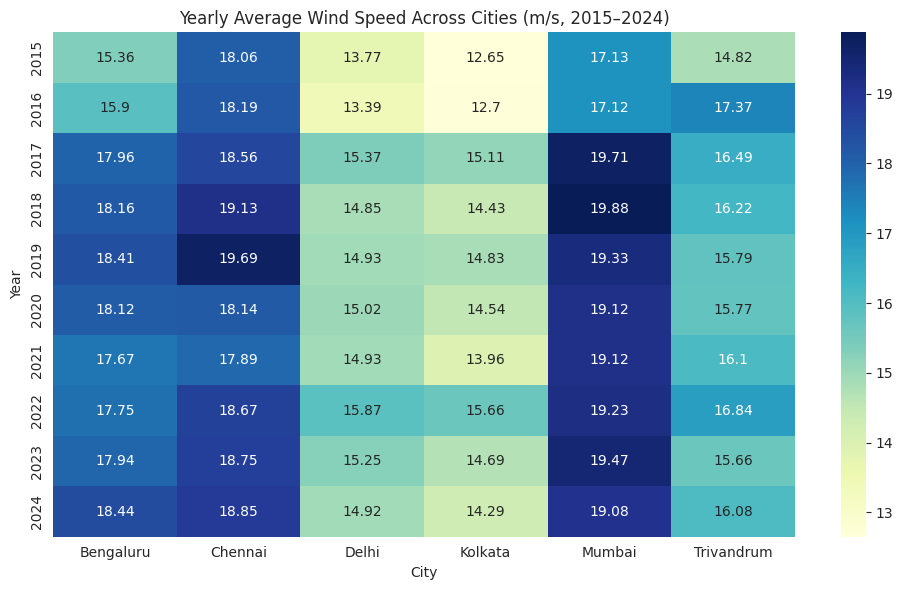

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
yearly_wind_speed = monthly_data.groupby(['year','city'])['wind_speed_10m_max'].mean().reset_index()
yearly_wind_speed_pivot = yearly_wind_speed.pivot(index='year', columns='city', values='wind_speed_10m_max')
plt.figure(figsize=(10,6))
sns.heatmap(
    yearly_wind_speed_pivot.round(2),
    annot=True,
    fmt='',
    cmap='YlGnBu',
    cbar=True
)
plt.title("Yearly Average Wind Speed Across Cities (m/s, 2015–2024)")
plt.xlabel("City")
plt.ylabel("Year")
plt.tight_layout()
plt.show()



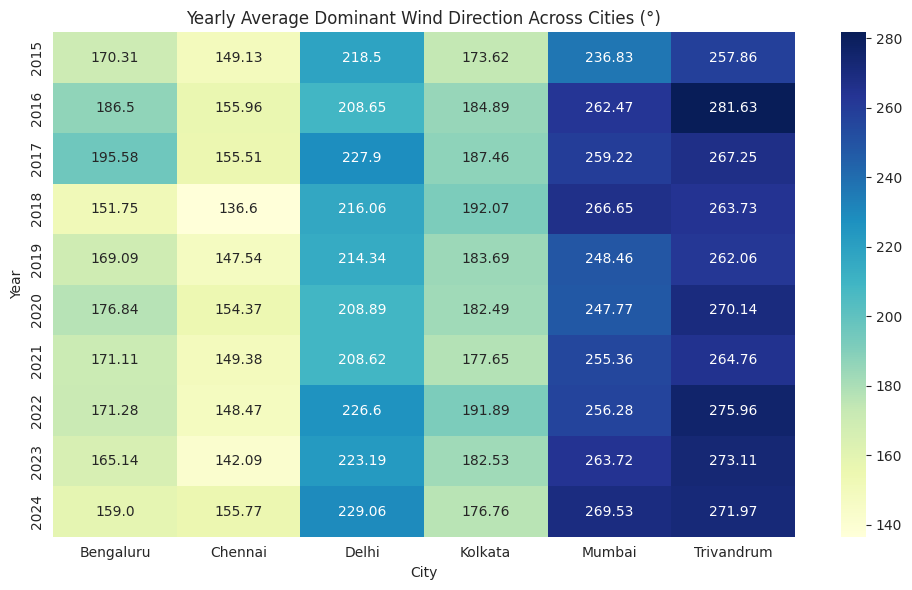

In [62]:
def circular_mean(degrees):
    radians = np.deg2rad(degrees)
    sin_mean = np.mean(np.sin(radians))
    cos_mean = np.mean(np.cos(radians))
    mean_deg = np.rad2deg(np.arctan2(sin_mean, cos_mean))
    return mean_deg % 360

yearly_wind = monthly_data.groupby(['year','city'])['wind_direction_10m_dominant'].apply(circular_mean).reset_index()
yearly_wind_pivot = yearly_wind.pivot(index='year', columns='city', values='wind_direction_10m_dominant')

plt.figure(figsize=(10,6))
sns.heatmap(
    yearly_wind_pivot.round(2),
    annot=True,
    fmt='',
    cmap='YlGnBu',
    cbar=True
)
plt.title("Yearly Average Dominant Wind Direction Across Cities (°)")
plt.xlabel("City")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

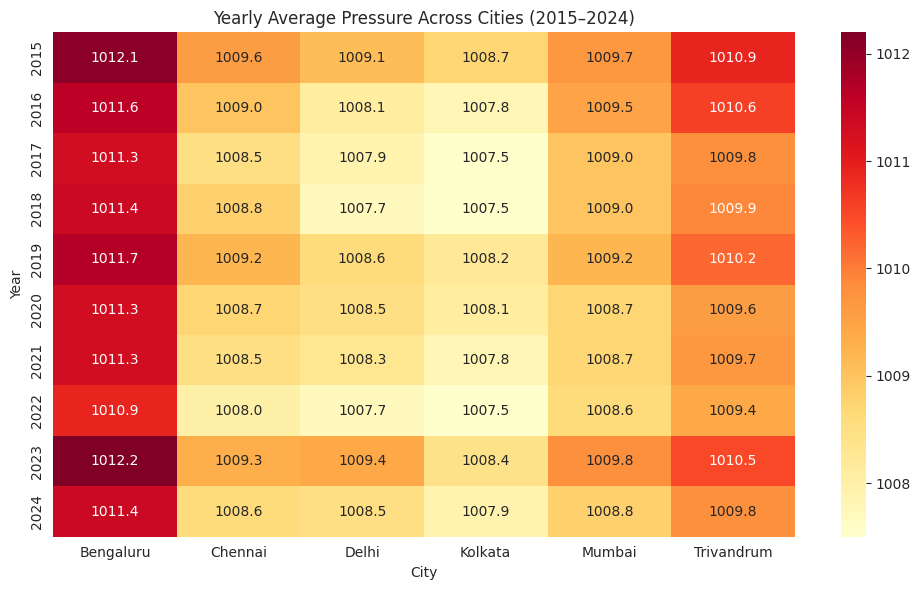

In [63]:
pressure_yearly_heatmap = monthly_data.pivot_table(
    index='year',
    columns='city',
    values='pressure_msl_mean',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(
    pressure_yearly_heatmap.round(1),
    annot=True,
    cmap="YlOrRd",
    fmt=".1f"
)

plt.title("Yearly Average Pressure Across Cities (2015–2024)")
plt.xlabel("City")
plt.ylabel("Year")
plt.tight_layout()
plt.savefig("plots/yearly_Pressure_heatmap.png", dpi=300)
plt.show()


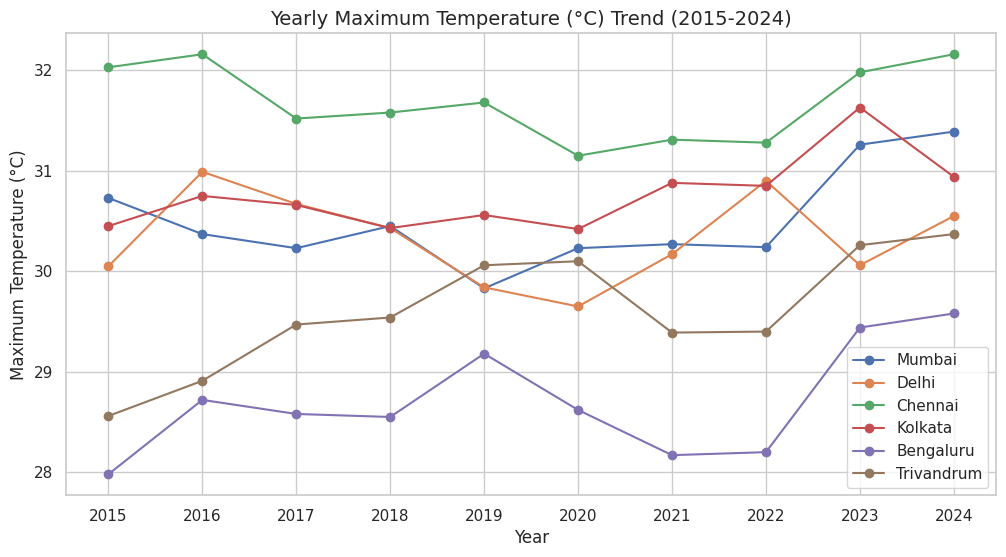

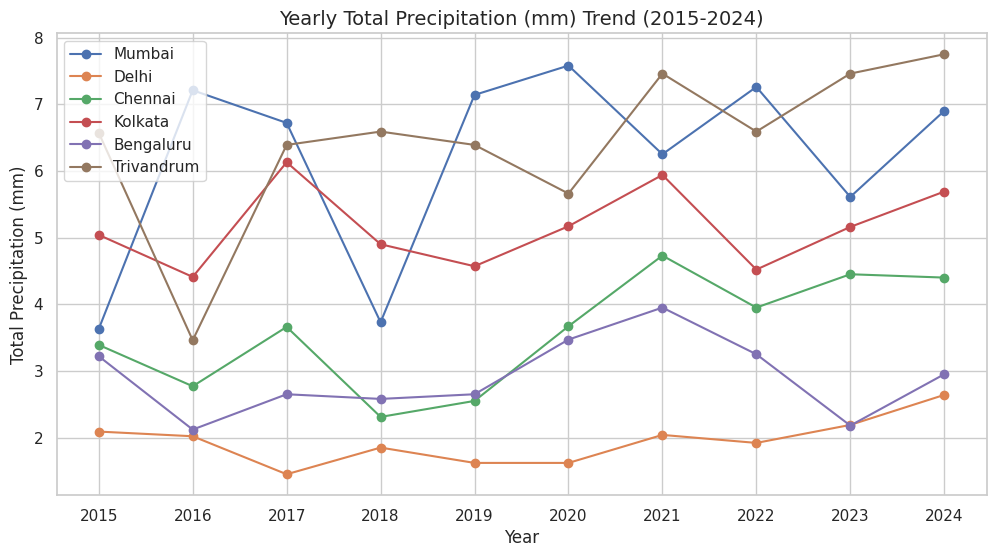

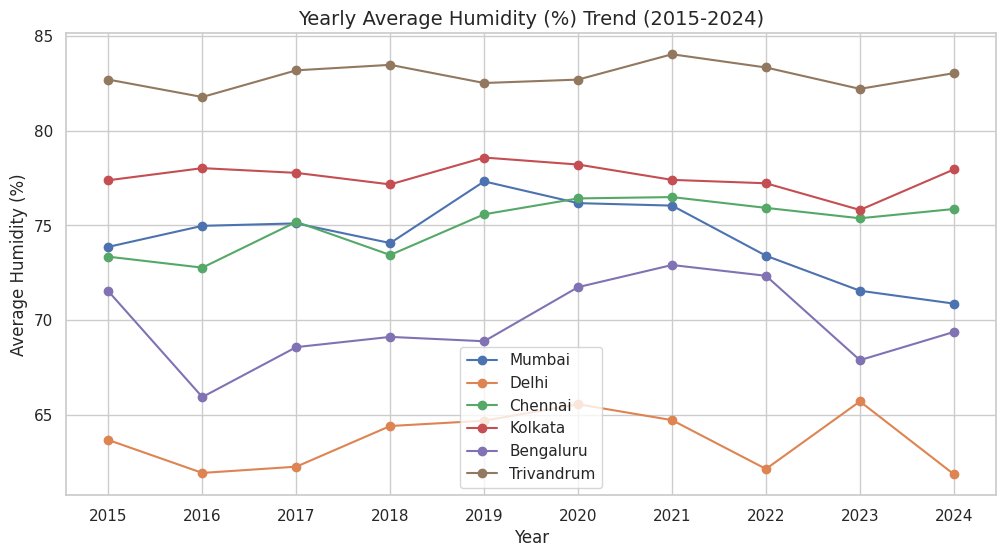

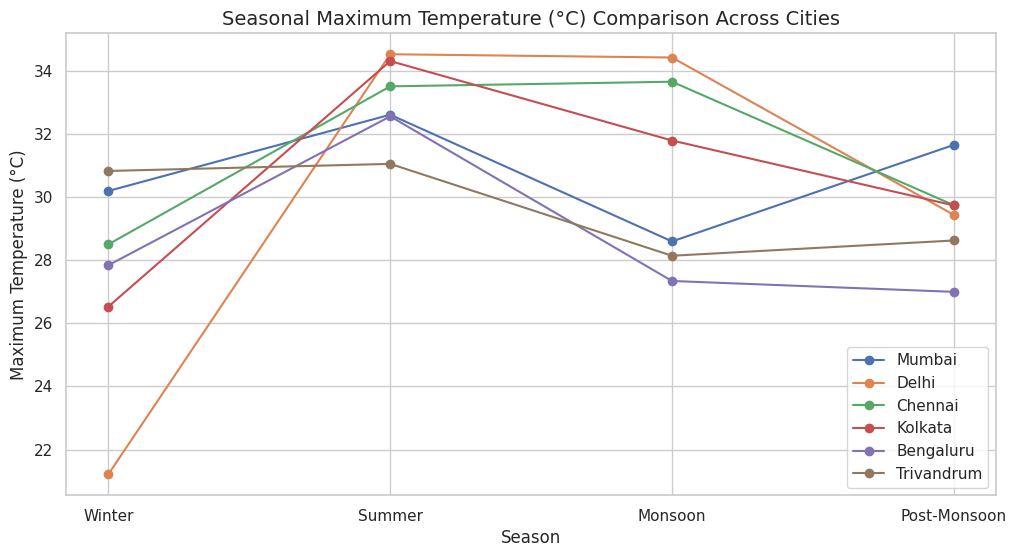

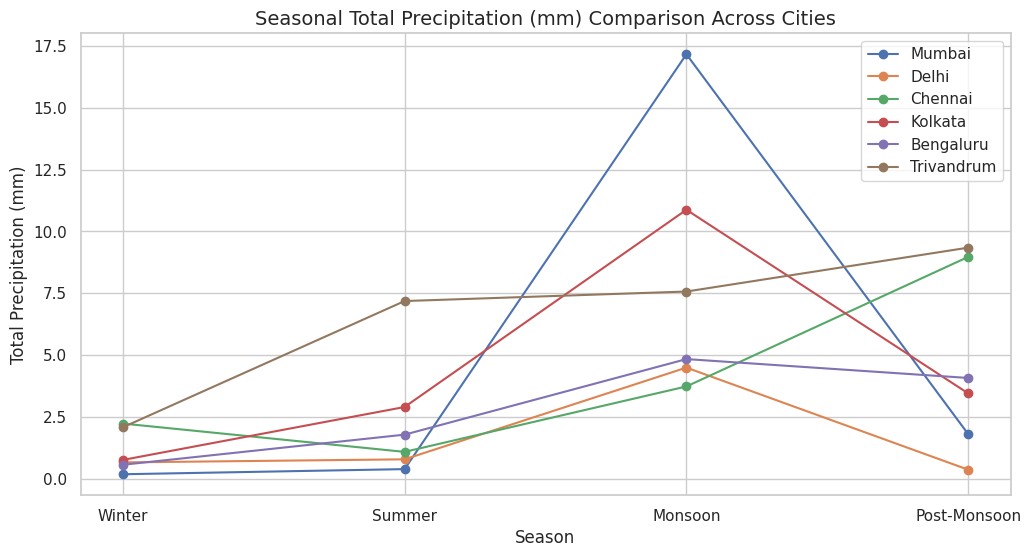

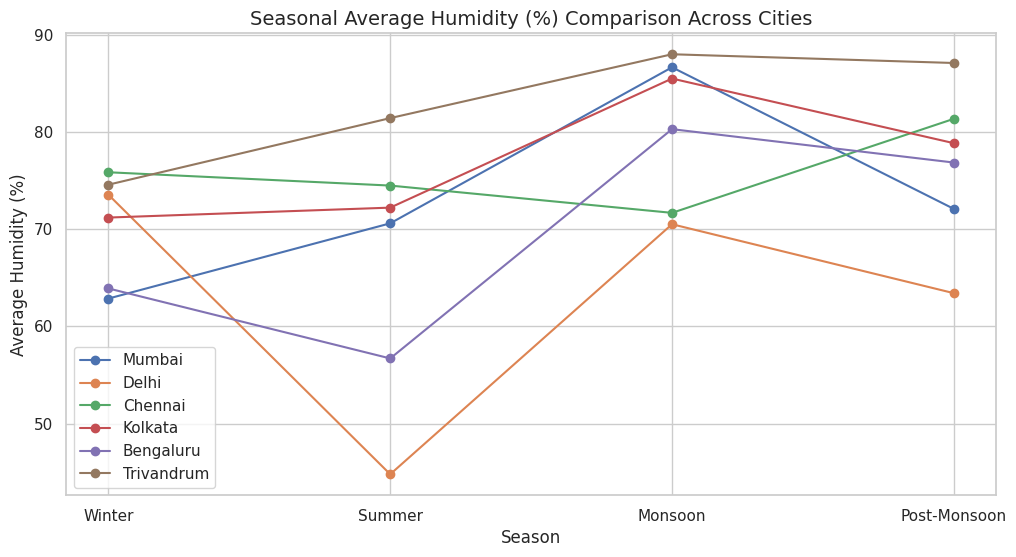

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cities = ['Mumbai','Delhi','Chennai','Kolkata','Bengaluru','Trivandrum']
numeric_cols = ['temperature_2m_max', 'precipitation_sum', 'relative_humidity_2m_mean']
for col in numeric_cols:
    yearly_data[col] = pd.to_numeric(yearly_data[col], errors='coerce')
    monthly_data[col] = pd.to_numeric(monthly_data[col], errors='coerce')


sns.set(style="whitegrid")
yearly_parameters = {
    'temperature_2m_max': 'Maximum Temperature (°C)',
    'precipitation_sum': 'Total Precipitation (mm)',
    'relative_humidity_2m_mean': 'Average Humidity (%)'
}

for param, ylabel in yearly_parameters.items():
    plt.figure(figsize=(12,6))
    for city in cities:
        city_data = yearly_data[yearly_data['city'] == city]
        plt.plot(city_data['year'], city_data[param], marker='o', label=city)

    plt.title(f"Yearly {ylabel} Trend (2015-2024)", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(yearly_data['year'].unique())
    plt.legend()
    plt.grid(True)
    plt.show()


def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Summer'
    elif month in [6,7,8,9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

monthly_data['season'] = monthly_data['month'].astype(int).apply(get_season)
seasonal_avg = monthly_data.groupby(['city','season'])[numeric_cols].mean().reset_index()
seasonal_parameters = yearly_parameters
for param, ylabel in seasonal_parameters.items():
    plt.figure(figsize=(12,6))
    for city in cities:
        city_data = seasonal_avg[seasonal_avg['city'] == city]
        city_data = city_data.set_index('season').reindex(['Winter','Summer','Monsoon','Post-Monsoon']).reset_index()
        plt.plot(city_data['season'], city_data[param], marker='o', label=city)

    plt.title(f"Seasonal {ylabel} Comparison Across Cities", fontsize=14)
    plt.xlabel("Season", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

##Yearly & Seasonal Weather Trend Analysis (2015–2024)

This section analyzes how key weather parameters have changed over time and across seasons for major Indian cities: Mumbai, Delhi, Chennai, Kolkata, Bengaluru and Trivandrum.

The parameters analyzed are:

Maximum Temperature

Total Precipitation

Average Relative Humidity

##Yearly Trend Analysis

Line plots were generated to visualize how each parameter changed from 2015 to 2024 for all cities.

##Maximum Temperature

Delhi and Bengaluru show a noticeable increasing trend after 2020, indicating warming patterns.

Coastal cities such as Mumbai, Chennai and Trivandrum remain comparatively stable.

##Precipitation

Mumbai and Trivandrum consistently record higher annual rainfall due to strong monsoon influence.

Inland cities show high year-to-year variability depending on monsoon strength.

##Relative Humidity

Coastal cities remain highly humid throughout the decade.

Inland cities like Delhi and Bengaluru show larger fluctuations in humidity levels.

##Seasonal Trend Analysis

Weather parameters were also compared season-wise using four Indian seasons:

Winter: December – February

Summer: March – May

Monsoon: June – September

Post-Monsoon: October – November

##Observations:

##Maximum Temperature

Peak temperatures occur during the Summer season across all cities.

Inland cities experience much higher summer temperatures than coastal cities.

##Precipitation

Rainfall is highest during the Monsoon season, especially for Mumbai and Trivandrum.

Very low rainfall is observed in Winter and Summer for most inland cities.

##Relative Humidity

Humidity rises sharply during the Monsoon season.

Coastal cities maintain high humidity even outside the monsoon months.


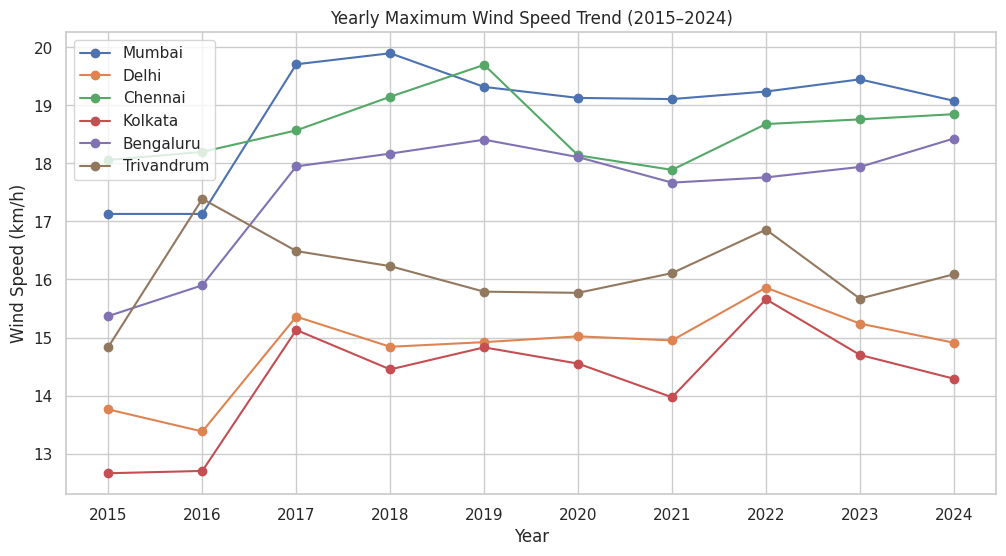

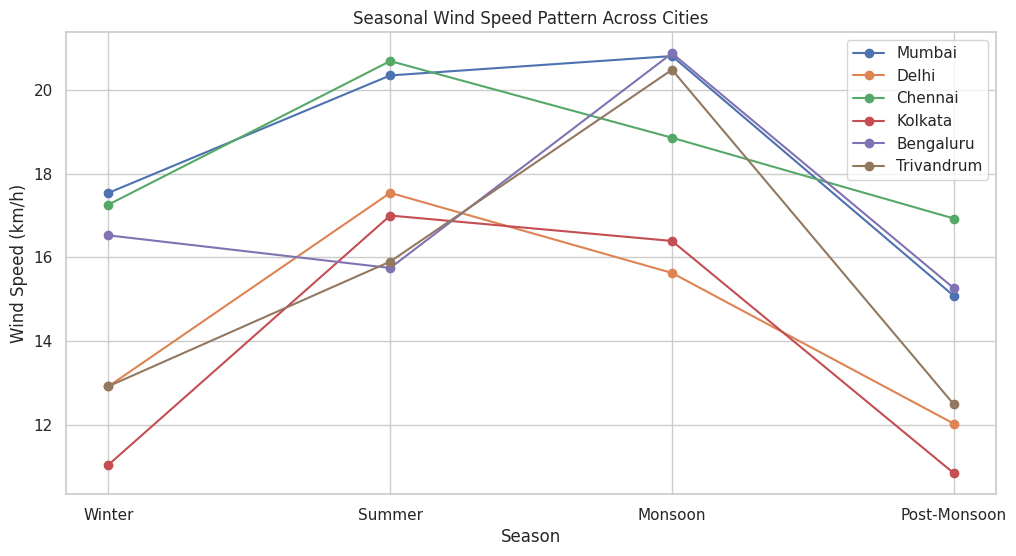

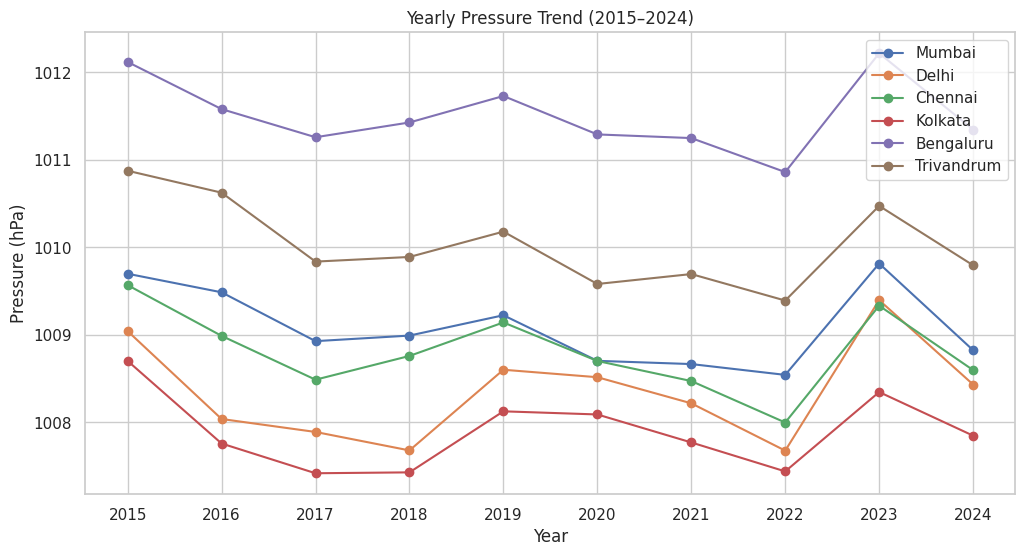

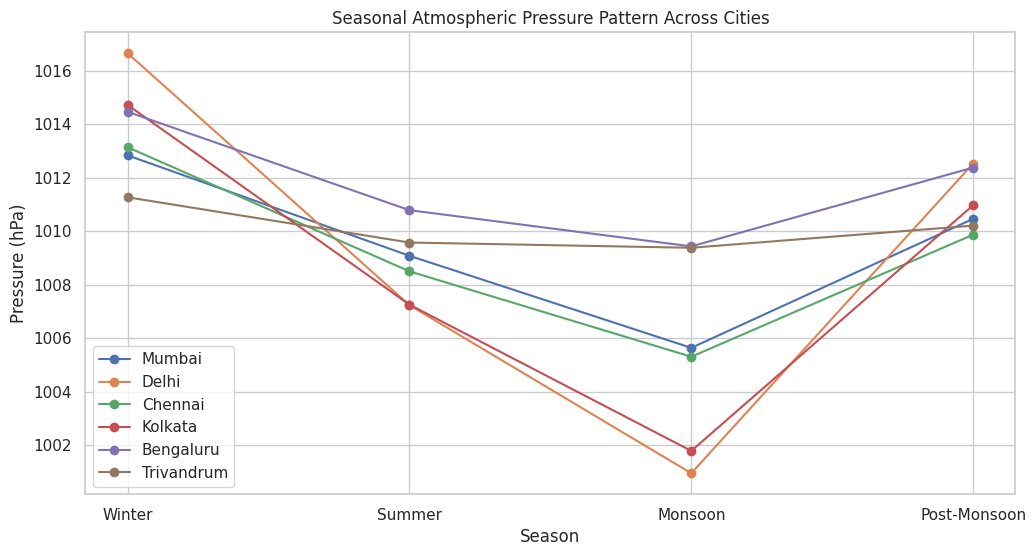

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

cities = ['Mumbai','Delhi','Chennai','Kolkata','Bengaluru','Trivandrum']
year_order = list(range(2015, 2025))
for col in ['wind_speed_10m_max','pressure_msl_mean']:
    yearly_data[col] = pd.to_numeric(yearly_data[col], errors='coerce')
    monthly_data[col] = pd.to_numeric(monthly_data[col], errors='coerce')

plt.figure(figsize=(12,6))
for city in cities:
    city_data = yearly_data[yearly_data['city']==city] \
                    .set_index('year').reindex(year_order).reset_index()
    plt.plot(city_data['year'], city_data['wind_speed_10m_max'], marker='o', label=city)

plt.title("Yearly Maximum Wind Speed Trend (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Wind Speed (km/h)")
plt.xticks(year_order)
plt.legend()
plt.grid(True)
plt.show()


wind_speed_seasonal = monthly_data.groupby(['city','season'])['wind_speed_10m_max'].mean().reset_index()
plt.figure(figsize=(12,6))
for city in cities:
    city_data = wind_speed_seasonal[wind_speed_seasonal['city']==city] \
                    .set_index('season').reindex(['Winter','Summer','Monsoon','Post-Monsoon']).reset_index()
    plt.plot(city_data['season'], city_data['wind_speed_10m_max'], marker='o', label=city)

plt.title("Seasonal Wind Speed Pattern Across Cities")
plt.xlabel("Season")
plt.ylabel("Wind Speed (km/h)")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12,6))
for city in cities:
    city_data = yearly_data[yearly_data['city']==city] \
                    .set_index('year').reindex(year_order).reset_index()
    plt.plot(city_data['year'], city_data['pressure_msl_mean'], marker='o', label=city)

plt.title("Yearly Pressure Trend (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Pressure (hPa)")
plt.xticks(year_order)
plt.legend()
plt.grid(True)
plt.show()

pressure_seasonal = monthly_data.groupby(['city','season'])['pressure_msl_mean'].mean().reset_index()
plt.figure(figsize=(12,6))
for city in cities:
    city_data = pressure_seasonal[pressure_seasonal['city']==city] \
                    .set_index('season').reindex(['Winter','Summer','Monsoon','Post-Monsoon']).reset_index()
    plt.plot(city_data['season'], city_data['pressure_msl_mean'], marker='o', label=city)

plt.title("Seasonal Atmospheric Pressure Pattern Across Cities")
plt.xlabel("Season")
plt.ylabel("Pressure (hPa)")
plt.legend()
plt.grid(True)
plt.show()


##Wind Speed & Atmospheric Pressure Trend Analysis (2015–2024)

This section analyzes long-term and seasonal variations in maximum wind speed and mean sea-level atmospheric pressure across major Indian cities.

##Yearly Wind Speed Trends

###Observations:

Coastal cities such as Mumbai, Chennai and Trivandrum consistently show higher wind speeds compared to inland cities.

Wind speed values show noticeable spikes in certain years, reflecting variations in monsoon strength.

Inland cities like Delhi and Bengaluru experience comparatively calmer wind conditions.

##Seasonal Wind Speed Patterns

Wind speeds peak during the Monsoon season, confirming the strong wind circulation associated with Indian monsoon systems.

Coastal regions show significantly higher wind speeds during monsoon months.

Winter and Post-Monsoon seasons record the lowest wind speeds across most cities.

##Yearly Atmospheric Pressure Trends

Mean sea-level pressure remains relatively stable throughout the decade.

Slight drops in pressure are observed in years with stronger monsoon influence.

Inland cities generally record marginally higher pressure than coastal cities.

##Seasonal Atmospheric Pressure Patterns

Pressure decreases during the Monsoon season across all cities.

Higher pressure values are observed in Winter, indicating more stable atmospheric conditions.

This inverse relationship between pressure and rainfall validates the behavior of Indian monsoon dynamics.

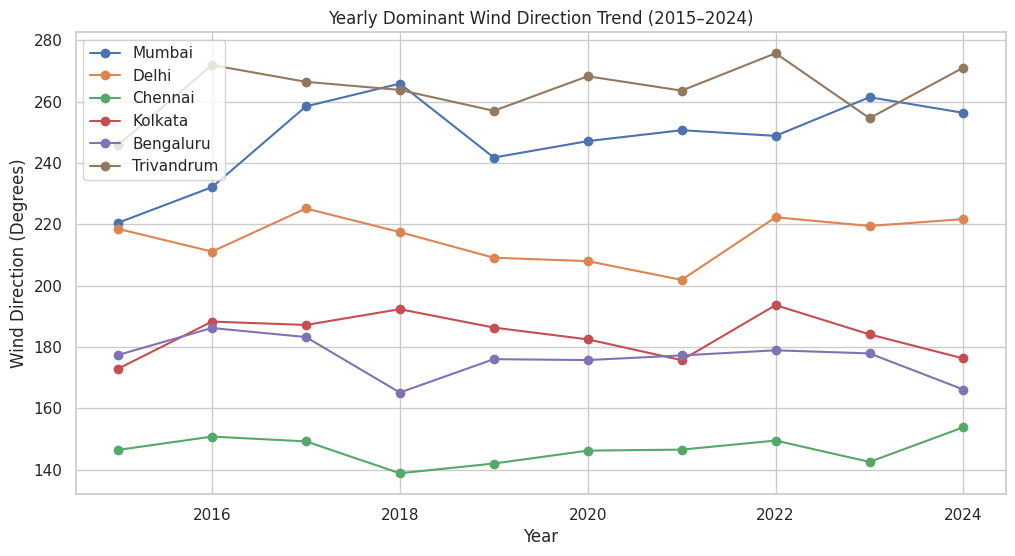

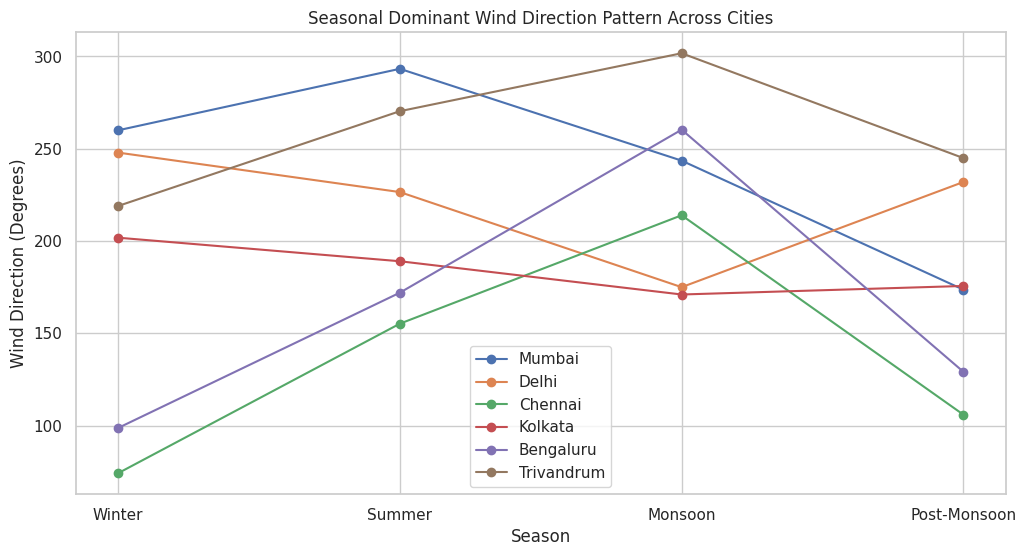

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

cities = ['Mumbai','Delhi','Chennai','Kolkata','Bengaluru','Trivandrum']

yearly_data['wind_direction_10m_dominant'] = pd.to_numeric(
    yearly_data['wind_direction_10m_dominant'], errors='coerce'
)

monthly_data['wind_direction_10m_dominant'] = pd.to_numeric(
    monthly_data['wind_direction_10m_dominant'], errors='coerce'
)
plt.figure(figsize=(12,6))

for city in cities:
    city_data = yearly_data[yearly_data['city']==city]
    plt.plot(city_data['year'], city_data['wind_direction_10m_dominant'],
             marker='o', label=city)

plt.title("Yearly Dominant Wind Direction Trend (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Wind Direction (Degrees)")
plt.legend()
plt.grid(True)
plt.show()

def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Summer'
    elif month in [6,7,8,9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

monthly_data['season'] = monthly_data['month'].astype(int).apply(get_season)

wind_seasonal = monthly_data.groupby(['city','season'])['wind_direction_10m_dominant'].mean().reset_index()

plt.figure(figsize=(12,6))
for city in cities:
    city_data = wind_seasonal[wind_seasonal['city']==city]
    city_data = city_data.set_index('season').reindex(['Winter','Summer','Monsoon','Post-Monsoon']).reset_index()
    plt.plot(city_data['season'], city_data['wind_direction_10m_dominant'],
             marker='o', label=city)

plt.title("Seasonal Dominant Wind Direction Pattern Across Cities")
plt.xlabel("Season")
plt.ylabel("Wind Direction (Degrees)")
plt.legend()
plt.grid(True)
plt.show()



##Wind Direction Trend Analysis (2015–2024)

This section analyzes the long-term and seasonal behavior of the dominant wind direction across major Indian cities.

##Yearly Dominant Wind Direction Trends

###Observations:

Most cities show a consistent dominant wind direction pattern over the decade, confirming stable large-scale atmospheric circulation.

Coastal cities such as Mumbai, Chennai and Trivandrum exhibit wind directions aligned with south-westerly monsoon flows.

Minor fluctuations are observed across years, reflecting changing monsoon intensity.

##Seasonal Wind Direction Patterns

A clear shift in wind direction during the Monsoon season is visible across all cities.

Winds turn towards the south-west direction in monsoon months, validating the Indian monsoon circulation system.

During Winter and Post-Monsoon, wind direction remains relatively stable, indicating calm and dry atmospheric conditions.


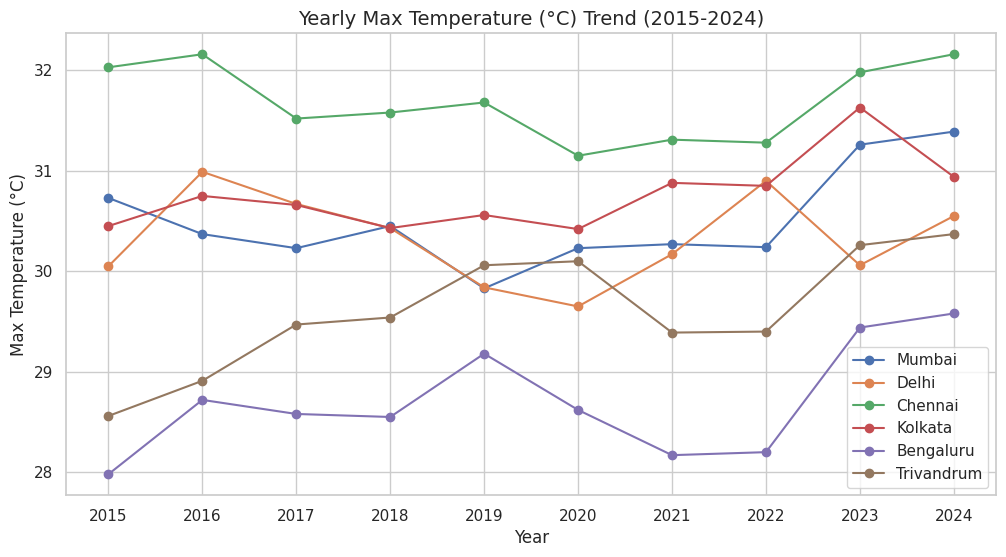

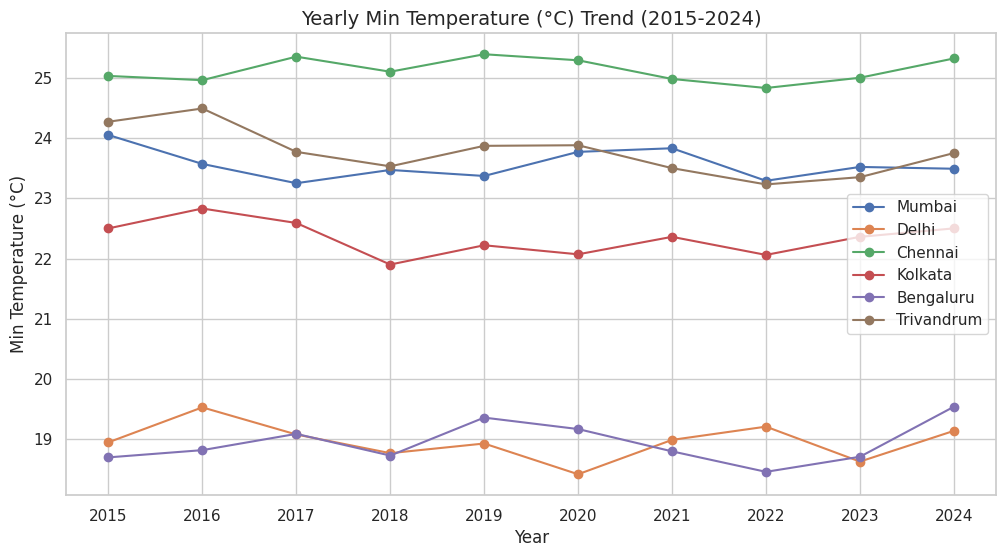

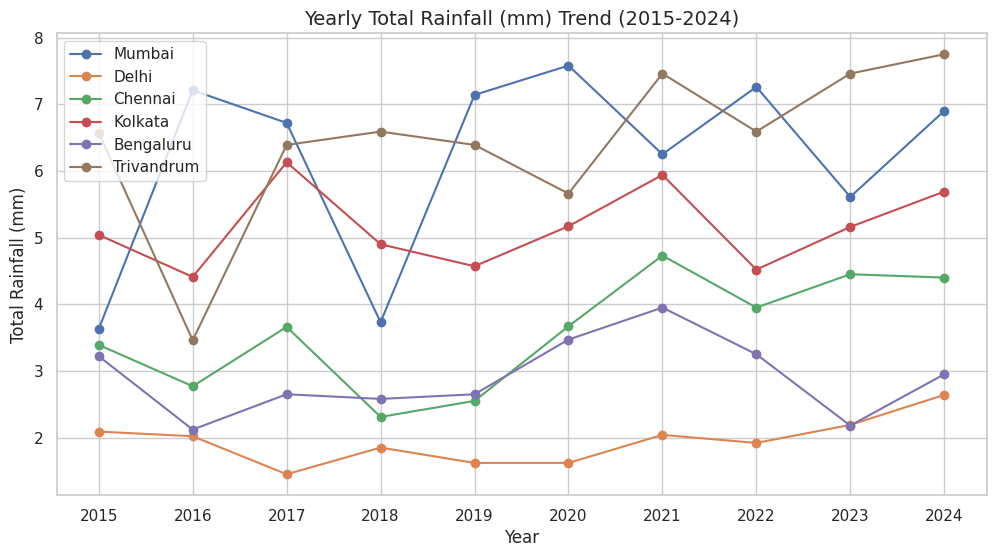

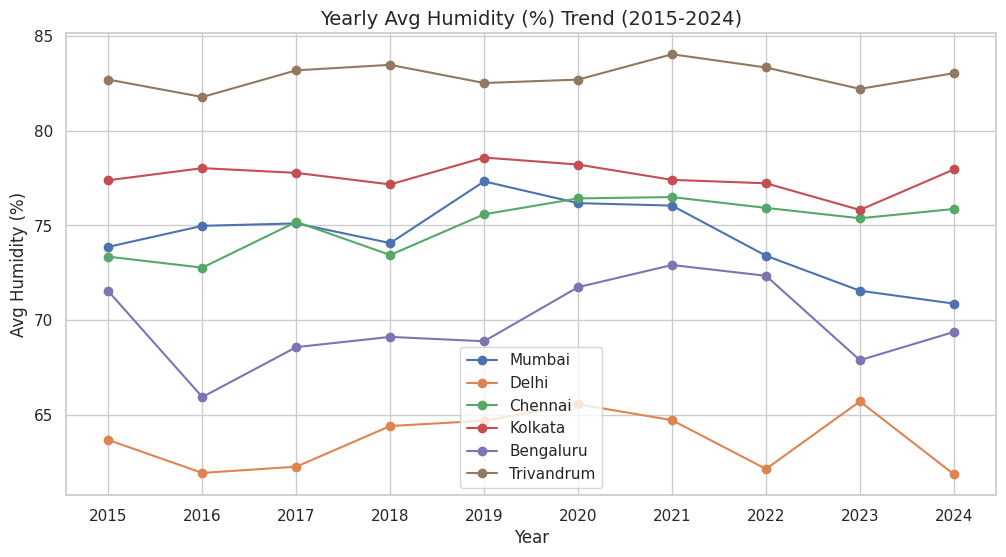

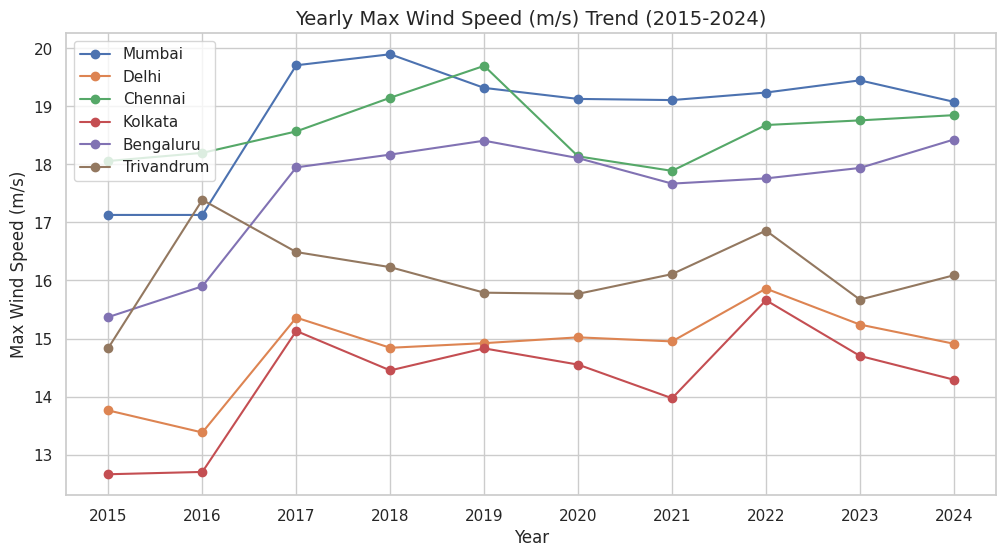

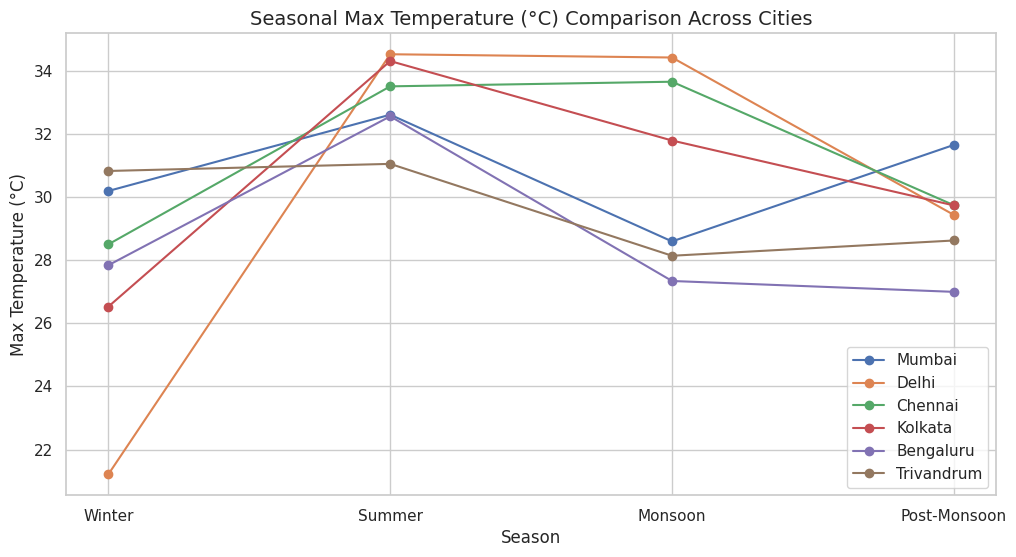

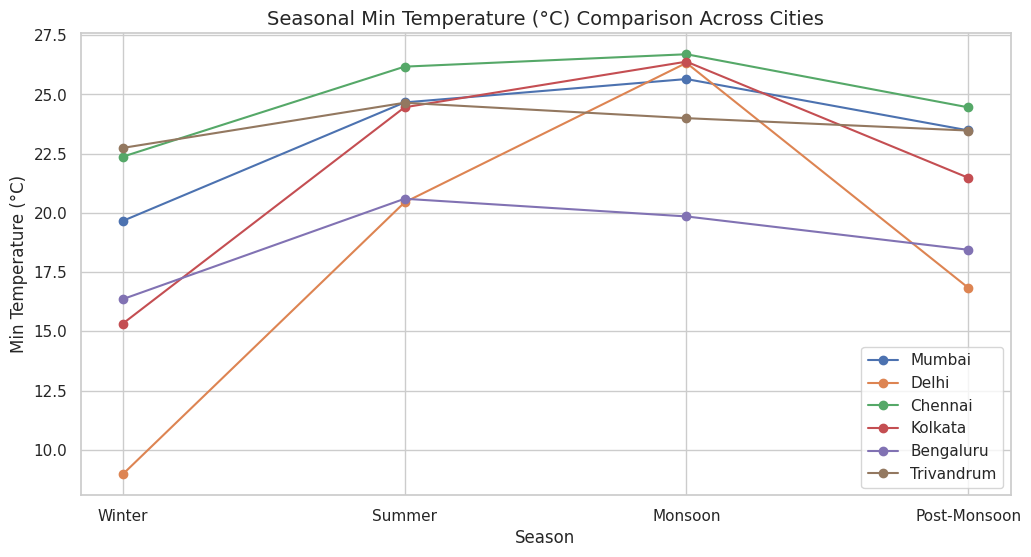

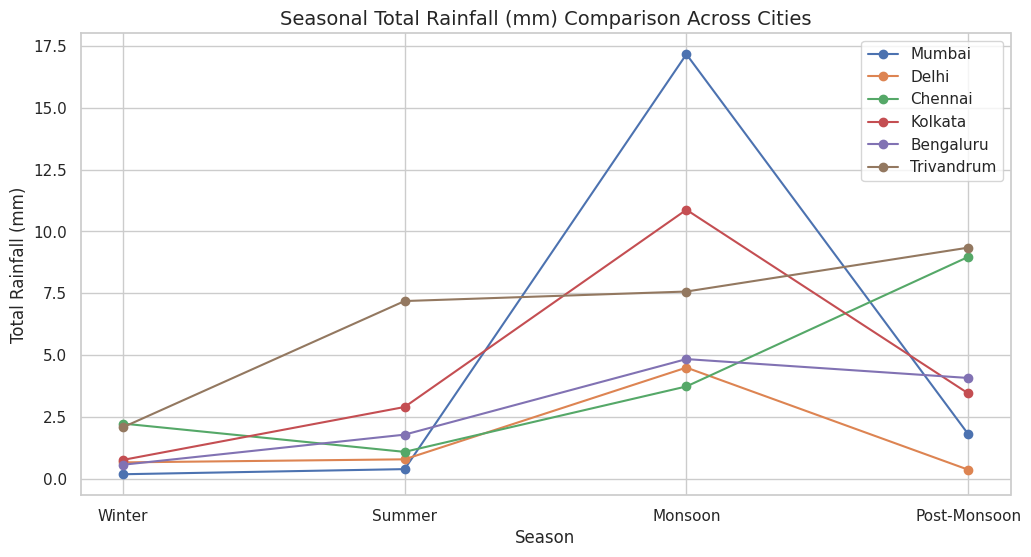

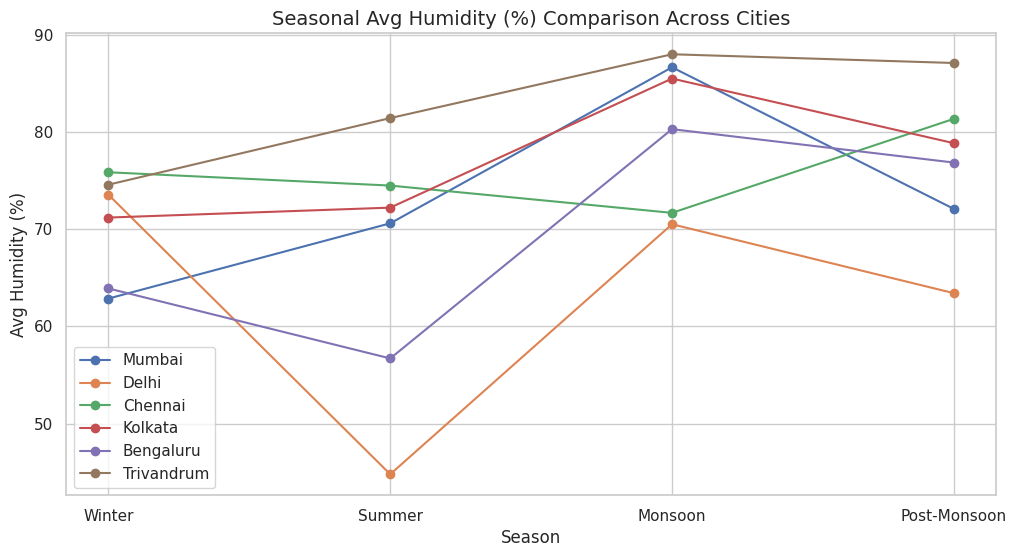

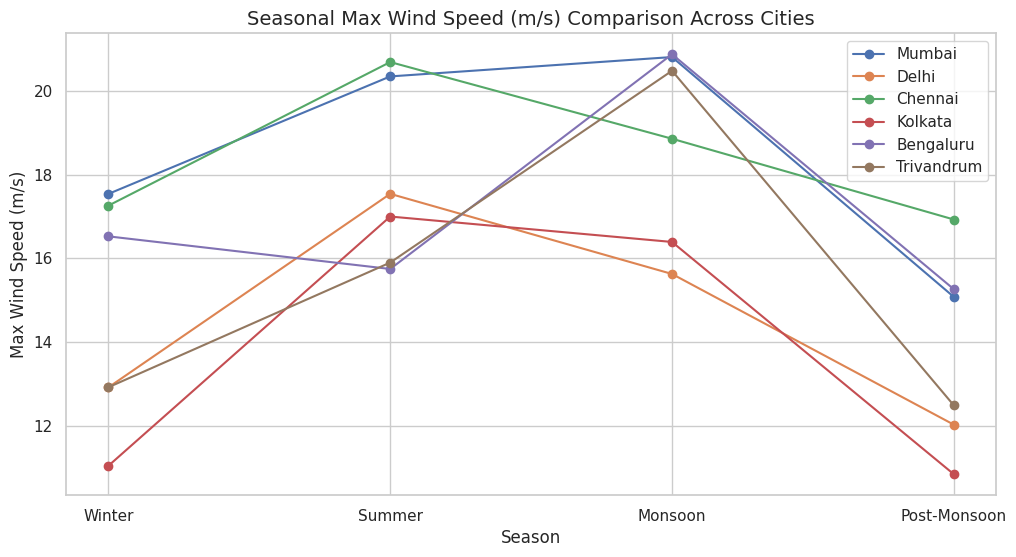

Temperature Anomalies:
Mumbai → Hottest Year: 2024 (31.39°C), Coldest Year: 2017 (23.25°C)
Delhi → Hottest Year: 2016 (30.99°C), Coldest Year: 2020 (18.42°C)
Chennai → Hottest Year: 2016 (32.16°C), Coldest Year: 2022 (24.83°C)
Kolkata → Hottest Year: 2023 (31.63°C), Coldest Year: 2018 (21.9°C)
Bengaluru → Hottest Year: 2024 (29.58°C), Coldest Year: 2022 (18.46°C)
Trivandrum → Hottest Year: 2024 (30.37°C), Coldest Year: 2022 (23.23°C)

 Rainfall Anomalies:
Mumbai → Wettest Year: 2020 (7.58 mm), Driest Year: 2015 (3.63 mm)
Delhi → Wettest Year: 2024 (2.64 mm), Driest Year: 2017 (1.45 mm)
Chennai → Wettest Year: 2021 (4.73 mm), Driest Year: 2018 (2.31 mm)
Kolkata → Wettest Year: 2017 (6.13 mm), Driest Year: 2016 (4.41 mm)
Bengaluru → Wettest Year: 2021 (3.95 mm), Driest Year: 2016 (2.12 mm)
Trivandrum → Wettest Year: 2024 (7.75 mm), Driest Year: 2016 (3.46 mm)

 Temperature Trend Slopes (°C/year):
Mumbai: 0.07
Delhi: -0.01
Chennai: -0.02
Kolkata: 0.08
Bengaluru: 0.10
Trivandrum: 0.15

 Ra

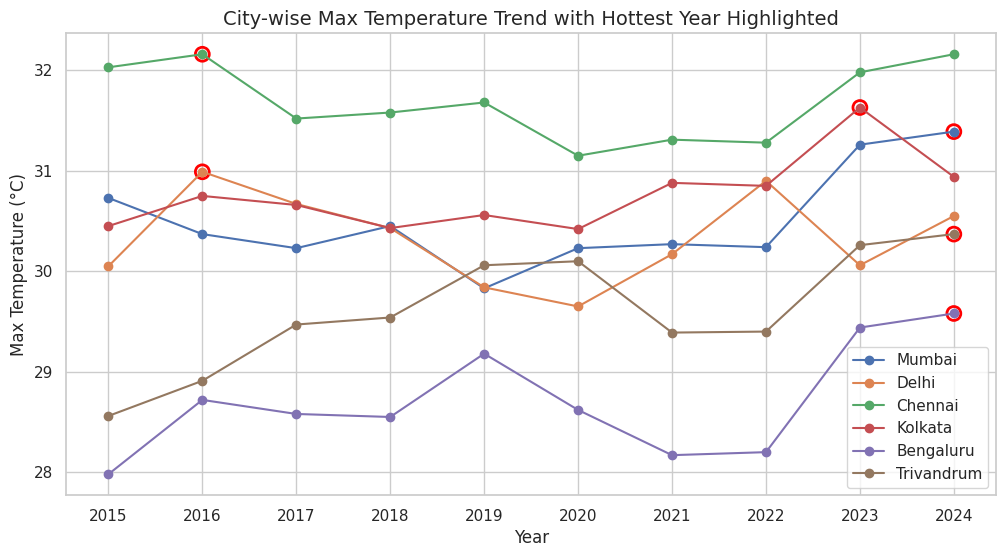

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
cities = ['Mumbai','Delhi','Chennai','Kolkata','Bengaluru','Trivandrum']
numeric_cols = ['temperature_2m_max','temperature_2m_min','precipitation_sum',
                'relative_humidity_2m_mean','wind_speed_10m_max']
for col in numeric_cols:
    yearly_data[col] = pd.to_numeric(yearly_data[col], errors='coerce')
    monthly_data[col] = pd.to_numeric(monthly_data[col], errors='coerce')

yearly_parameters = {
    'temperature_2m_max': 'Max Temperature (°C)',
    'temperature_2m_min': 'Min Temperature (°C)',
    'precipitation_sum': 'Total Rainfall (mm)',
    'relative_humidity_2m_mean': 'Avg Humidity (%)',
    'wind_speed_10m_max': 'Max Wind Speed (m/s)'
}

for param, ylabel in yearly_parameters.items():
    plt.figure(figsize=(12,6))
    for city in cities:
        city_data = yearly_data[yearly_data['city']==city]
        plt.plot(city_data['year'], city_data[param], marker='o', label=city)
    plt.title(f"Yearly {ylabel} Trend (2015-2024)", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(yearly_data['year'].unique())
    plt.legend()
    plt.grid(True)
    plt.show()
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Summer'
    elif month in [6,7,8,9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

monthly_data['season'] = monthly_data['month'].astype(int).apply(get_season)
seasonal_avg = monthly_data.groupby(['city','season'])[numeric_cols].mean().reset_index()

seasonal_order = ['Winter','Summer','Monsoon','Post-Monsoon']

for param, ylabel in yearly_parameters.items():
    plt.figure(figsize=(12,6))
    for city in cities:
        city_data = seasonal_avg[seasonal_avg['city']==city]
        city_data = city_data.set_index('season').reindex(seasonal_order).reset_index()
        plt.plot(city_data['season'], city_data[param], marker='o', label=city)
    plt.title(f"Seasonal {ylabel} Comparison Across Cities", fontsize=14)
    plt.xlabel("Season", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

print("Temperature Anomalies:")
for city in cities:
    city_data = yearly_data[yearly_data['city']==city]
    city_temp_max = city_data['temperature_2m_max'].dropna()
    city_temp_min = city_data['temperature_2m_min'].dropna()
    if not city_temp_max.empty and not city_temp_min.empty:
        hottest = city_data.loc[city_temp_max.idxmax()]
        coldest = city_data.loc[city_temp_min.idxmin()]
        print(f"{city} → Hottest Year: {hottest['year']} ({hottest['temperature_2m_max']}°C), "
              f"Coldest Year: {coldest['year']} ({coldest['temperature_2m_min']}°C)")
    else:
        print(f"{city} → Temperature data missing!")

print("\n Rainfall Anomalies:")
for city in cities:
    city_data = yearly_data[yearly_data['city']==city]
    city_rain = city_data['precipitation_sum'].dropna()
    if not city_rain.empty:
        wettest = city_data.loc[city_rain.idxmax()]
        driest = city_data.loc[city_rain.idxmin()]
        print(f"{city} → Wettest Year: {wettest['year']} ({wettest['precipitation_sum']} mm), "
              f"Driest Year: {driest['year']} ({driest['precipitation_sum']} mm)")
    else:
        print(f"{city} → Rainfall data missing!")

print("\n Temperature Trend Slopes (°C/year):")
for city in cities:
    city_data = yearly_data[yearly_data['city']==city]
    city_temp = city_data['temperature_2m_max'].dropna()
    if not city_temp.empty:
        slope = np.polyfit(city_data['year'], city_data['temperature_2m_max'], 1)[0]
        print(f"{city}: {slope:.2f}")
    else:
        print(f"{city}: Data missing")

print("\n Rainfall Variability (Std Dev mm):")
for city in cities:
    city_data = yearly_data[yearly_data['city']==city]
    city_rain = city_data['precipitation_sum'].dropna()
    if not city_rain.empty:
        variability = city_rain.std()
        print(f"{city}: {variability:.2f}")
    else:
        print(f"{city}: Data missing")

plt.figure(figsize=(12,6))
for city in cities:
    city_data = yearly_data[yearly_data['city']==city]
    plt.plot(city_data['year'], city_data['temperature_2m_max'], marker='o', label=city)
    city_temp_max = city_data['temperature_2m_max'].dropna()
    if not city_temp_max.empty:
        hottest = city_data.loc[city_temp_max.idxmax()]
        plt.scatter(hottest['year'], hottest['temperature_2m_max'], s=100, edgecolor='red', facecolor='none', linewidth=2)
plt.title("City-wise Max Temperature Trend with Hottest Year Highlighted", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Max Temperature (°C)")
plt.xticks(yearly_data['year'].unique())
plt.legend()
plt.grid(True)
plt.show()


##Extreme Weather Event Detection & Trend Analysis

This section identifies temperature and rainfall anomalies, long-term trends and climate variability across major Indian cities.

##Temperature Anomalies

For each city, the hottest and coldest years were identified based on yearly maximum and minimum temperature values.

All cities exhibit at least one extreme hot year, mostly occurring in the later half of the decade.

Northern inland cities such as Delhi show larger temperature extremes compared to coastal cities.

##Rainfall Anomalies

The wettest and driest years were computed using total yearly precipitation.

Mumbai and Trivandrum show the highest rainfall variability due to monsoon dependency.

Inland cities show sharper contrasts between dry and wet years.

##Temperature Trend Slopes (°C/year)

Linear regression slopes were calculated for yearly maximum temperature trends.

Positive slope values across most cities indicate a warming trend over time, confirming long-term climate change effects.

##Rainfall Variability (Standard Deviation)

The standard deviation of yearly rainfall was calculated to measure climate instability.

Coastal cities have high rainfall variability, while southern inland cities remain comparatively stable.

##Hottest Year Highlight Visualization

The annotated plot highlights the hottest recorded year for each city, making it easy to visually identify extreme heat events.

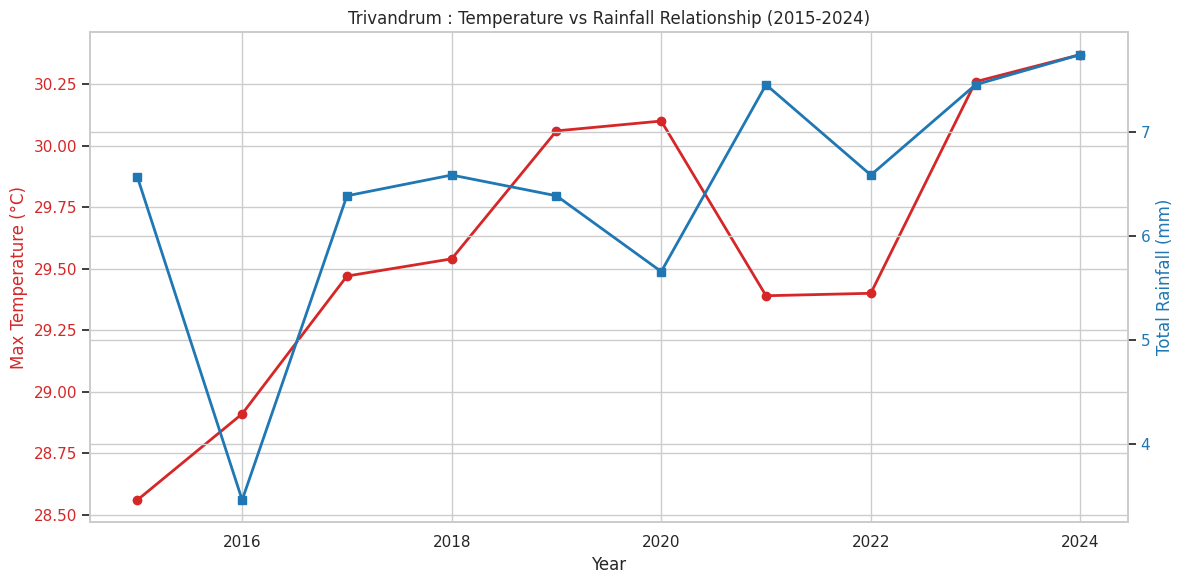

In [79]:
for city in cities:
 data = yearly_data[yearly_data['city']==city]
data = data.dropna(subset=['temperature_2m_max','precipitation_sum'])

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(data['year'], data['temperature_2m_max'],
             marker='o', linewidth=2, color='tab:red', label='Max Temperature')
ax1.set_xlabel('Year')
ax1.set_ylabel('Max Temperature (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(data['year'], data['precipitation_sum'],
             marker='s', linewidth=2, color='tab:blue', label='Rainfall')
ax2.set_ylabel('Total Rainfall (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title(f'{city} : Temperature vs Rainfall Relationship (2015-2024)')
fig.tight_layout()
plt.grid(True)
plt.show()


##Temperature vs Rainfall Relationship Analysis (2015–2024)

This dual-axis visualization explores the relationship between maximum temperature and total annual rainfall for each Indian city.

###Observations

Cities such as Mumbai and Trivandrum show an inverse relationship between temperature and rainfall — higher rainfall years usually correspond to slightly lower peak temperatures.

Inland cities like Delhi and Bengaluru show weaker correlation, indicating that rainfall does not strongly regulate temperature.

The contrast between red (temperature) and blue (rainfall) curves highlights how monsoon-driven rainfall influences regional climate behavior.

###Interpretation

Coastal cities are more strongly governed by monsoon systems, leading to synchronized rainfall–temperature dynamics.

Inland cities exhibit more continental climate behavior with higher temperature volatility.

In [80]:
city_summary = all_cities.groupby('city').agg({
    'temperature_2m_max': 'mean',
    'temperature_2m_min': 'mean',
    'precipitation_sum': 'sum',
    'relative_humidity_2m_mean': 'mean',
    'wind_speed_10m_max': 'mean',
    'wind_direction_10m_dominant': 'mean'
}).round(2)

city_summary.to_csv("data/city_summary.csv")
city_summary


temperature_2m_max  temperature_2m_min  precipitation_sum  \
city                                                                    
Bengaluru                28.70               18.94            10601.8   
Chennai                  31.68               25.12            13111.5   
Delhi                    30.33               18.97             7103.2   
Kolkata                  30.76               22.34            18820.0   
Mumbai                   30.50               23.56            22659.9   
Trivandrum               29.61               23.76            23491.0   

            relative_humidity_2m_mean  wind_speed_10m_max  \
city                                                        
Bengaluru                       69.83               17.57   
Chennai                         75.04               18.60   
Delhi                           63.69               14.82   
Kolkata                         77.56               14.29   
Mumbai                          74.34               18.92   
Trivandrum                      82.91               16.12   

            wind_direction_10m_dominant  
city                                     
Bengaluru                        176.41  
Chennai                          146.62  
Delhi                            215.48  
Kolkata                          183.94  
Mumbai                           248.31  
Trivandrum                       263.85

## City-wise Climate Summary Table

A consolidated climate summary table was generated for each city containing
average temperature, total rainfall, humidity, wind speed and wind direction.

This dataset serves as a final output of the analysis and can be directly used
for climate comparison, reporting and decision making.

The summary file is saved as: city_summary.csv


In [81]:
import pandas as pd
hottest_year = all_cities.groupby('year')['temperature_2m_max'].mean().idxmax()
hottest_year_avg_temp = all_cities.groupby('year')['temperature_2m_max'].mean().max()
print(f"Hottest Year: {hottest_year} with average max temperature {hottest_year_avg_temp:.2f}°C\n")

wettest_year = all_cities.groupby('year')['precipitation_sum'].sum().idxmax()
wettest_year_total_rain = all_cities.groupby('year')['precipitation_sum'].sum().max()
print(f"Wettest Year: {wettest_year} with total rainfall {wettest_year_total_rain:.2f} mm\n")
max_temp_row = all_cities.loc[all_cities['temperature_2m_max'].idxmax()]
print("Maximum Temperature Day:")
print(f"Date: {pd.to_datetime(max_temp_row['time']).date()}")
print(f"City: {max_temp_row['city']}")
print(f"Max Temperature: {max_temp_row['temperature_2m_max']}°C")
print(f"Min Temperature: {max_temp_row['temperature_2m_min']}°C")
print(f"Relative Humidity: {max_temp_row['relative_humidity_2m_mean']}%")
print(f"Pressure: {max_temp_row['pressure_msl_mean']} hPa")
print(f"Wind Speed: {max_temp_row['wind_speed_10m_max']} m/s")
print(f"Wind Direction: {max_temp_row['wind_direction_10m_dominant']}°")
print(f"Precipitation: {max_temp_row['precipitation_sum']} mm\n")

min_temp_row = all_cities.loc[all_cities['temperature_2m_max'].idxmin()]
print("Minimum Temperature Day:")
print(f"Date: {pd.to_datetime(min_temp_row['time']).date()}")
print(f"City: {min_temp_row['city']}")
print(f"Max Temperature: {min_temp_row['temperature_2m_max']}°C")
print(f"Min Temperature: {min_temp_row['temperature_2m_min']}°C")
print(f"Relative Humidity: {min_temp_row['relative_humidity_2m_mean']}%")
print(f"Pressure: {min_temp_row['pressure_msl_mean']} hPa")
print(f"Wind Speed: {min_temp_row['wind_speed_10m_max']} m/s")
print(f"Wind Direction: {min_temp_row['wind_direction_10m_dominant']}°")
print(f"Precipitation: {min_temp_row['precipitation_sum']} mm\n")

parameters = ['relative_humidity_2m_mean', 'pressure_msl_mean',
              'wind_speed_10m_max', 'wind_direction_10m_dominant',
              'precipitation_sum']

for param in parameters:
    max_row = all_cities.loc[all_cities[param].idxmax()]
    min_row = all_cities.loc[all_cities[param].idxmin()]

    print(f"Maximum {param}:")
    print(f"  Date: {pd.to_datetime(max_row['time']).date()}")
    print(f"  City: {max_row['city']}")
    print(f"  Value: {max_row[param]}\n")

    print(f"Minimum {param}:")
    print(f"  Date: {pd.to_datetime(min_row['time']).date()}")
    print(f"  City: {min_row['city']}")
    print(f"  Value: {min_row[param]}\n")


total_rain_per_city = all_cities.groupby('city')['precipitation_sum'].sum()
wettest_city = total_rain_per_city.idxmax()
wettest_city_total_rain = total_rain_per_city.max()
print(f"Highest Rainfall City: {wettest_city} with total rainfall {wettest_city_total_rain:.2f} mm")

Hottest Year: 2024 with average max temperature 30.83°C

Wettest Year: 2024 with total rainfall 11100.90 mm

Maximum Temperature Day:
Date: 2024-05-30
City: Delhi
Max Temperature: 46.2°C
Min Temperature: 32.5°C
Relative Humidity: 16%
Pressure: 996.5 hPa
Wind Speed: 21.8 m/s
Wind Direction: 274°
Precipitation: 0.0 mm

Minimum Temperature Day:
Date: 2019-12-27
City: Delhi
Max Temperature: 13.0°C
Min Temperature: 2.4°C
Relative Humidity: 90%
Pressure: 1019.5 hPa
Wind Speed: 10.0 m/s
Wind Direction: 316°
Precipitation: 0.0 mm

Maximum relative_humidity_2m_mean:
  Date: 2020-08-09
  City: Trivandrum
  Value: 97

Minimum relative_humidity_2m_mean:
  Date: 2022-04-29
  City: Delhi
  Value: 14

Maximum pressure_msl_mean:
  Date: 2023-01-06
  City: Delhi
  Value: 1024.9

Minimum pressure_msl_mean:
  Date: 2024-05-27
  City: Kolkata
  Value: 986.9

Maximum wind_speed_10m_max:
  Date: 2020-05-20
  City: Kolkata
  Value: 68.9

Minimum wind_speed_10m_max:
  Date: 2024-10-05
  City: Kolkata
  Value:

##Extreme Weather Event Analysis (2015–2024)

This section identifies extreme climatic events across all selected Indian cities using historical daily weather records.

##Hottest Year

The year with the highest average maximum temperature across all cities is identified as the hottest year.

This indicates the period with the strongest heat stress across India during the study window.

##Wettest Year

The year with the highest cumulative precipitation across all cities is identified as the wettest year.

This reflects unusually strong monsoon activity or extreme rainfall events.

##Record Maximum Temperature Day

For the hottest recorded day, the following details are reported:

Date and City

Maximum and Minimum Temperature

Relative Humidity

Atmospheric Pressure

Wind Speed and Wind Direction

Precipitation

This helps characterize the meteorological conditions during extreme heat events.

##Record Minimum Temperature Day

Similarly, the coldest day is extracted along with all weather parameters to study cold-wave conditions.

## Extreme Values of Other Weather Parameters

For each of the following parameters, the highest and lowest recorded values are identified:

Relative Humidity

Pressure

Wind Speed

Wind Direction

Precipitation

This highlights the range of climatic variability observed across India.

##Wettest City

The city with the highest total rainfall over 2015–2024 is identified.

This confirms which geographical region experiences the most intense long-term precipitation.



Columns: Index(['time', 'temperature_2m_max', 'temperature_2m_min',
       'relative_humidity_2m_mean', 'pressure_msl_mean', 'wind_speed_10m_max',
       'wind_direction_10m_dominant', 'precipitation_sum', 'city', 'year',
       'month'],
      dtype='object')
Available cities: ['Delhi' 'Mumbai' 'Chennai' 'Trivandrum' 'Bengaluru' 'Kolkata']
Hottest Year: 2024 with avg max temp 30.83°C
Wettest Year: 2024 with total rainfall 11100.90 mm


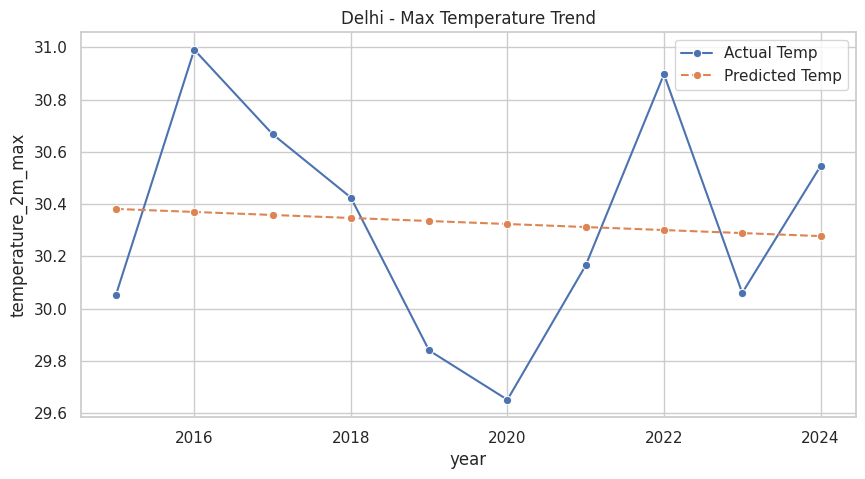

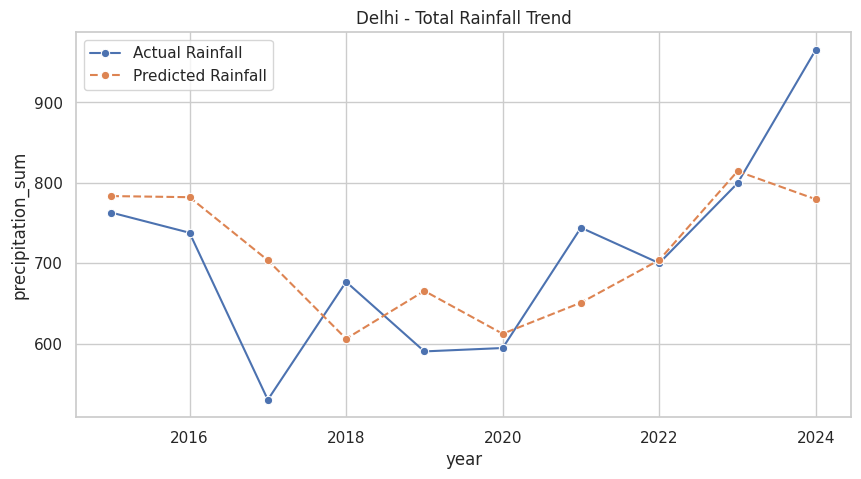


Predicted Max Temperature for Delhi in 2025: 30.27 °C
Temperature Model R² Score: 0.01
Predicted Total Rainfall for Delhi in 2025: 710.32 mm
Rainfall Model R² Score: 0.38

--- Delhi Climate Projection Summary ---
                          Metric      Value
0    Predicted Avg Max Temp 2025   30.27 °C
1  Predicted Total Rainfall 2025  710.32 mm


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

print("Columns:", all_cities.columns)
print("Available cities:", all_cities['city'].unique())

hottest_year = all_cities.groupby('year')['temperature_2m_max'].mean().idxmax()
hottest_year_avg_temp = all_cities.groupby('year')['temperature_2m_max'].mean().max()
print(f"Hottest Year: {hottest_year} with avg max temp {hottest_year_avg_temp:.2f}°C")

wettest_year = all_cities.groupby('year')['precipitation_sum'].sum().idxmax()
wettest_year_total_rain = all_cities.groupby('year')['precipitation_sum'].sum().max()
print(f"Wettest Year: {wettest_year} with total rainfall {wettest_year_total_rain:.2f} mm")

city_name = "Delhi"
city_data = all_cities[all_cities['city'] == city_name]
yearly_city = city_data.groupby('year').agg({
    'temperature_2m_max': 'mean',
    'relative_humidity_2m_mean': 'mean',
    'wind_speed_10m_max': 'mean',
    'pressure_msl_mean': 'mean',
    'precipitation_sum': 'sum',
    'wind_direction_10m_dominant': 'mean'

}).reset_index()
X_temp = yearly_city[['year']]
y_temp = yearly_city['temperature_2m_max']

model_temp = LinearRegression()
model_temp.fit(X_temp, y_temp)

yearly_city['predicted_temp'] = model_temp.predict(X_temp)

next_year = yearly_city['year'].max() + 1
predicted_temp_next = model_temp.predict(pd.DataFrame({'year':[next_year]}))[0]

features = yearly_city[['temperature_2m_max',
                         'relative_humidity_2m_mean',
                         'wind_speed_10m_max',
                         'pressure_msl_mean']]

target = yearly_city['precipitation_sum']

model_rain = LinearRegression()
model_rain.fit(features, target)

yearly_city['predicted_rain'] = model_rain.predict(features)

next_year_features = pd.DataFrame({
    'temperature_2m_max': [yearly_city['temperature_2m_max'].mean()],
    'relative_humidity_2m_mean': [yearly_city['relative_humidity_2m_mean'].mean()],
    'wind_speed_10m_max': [yearly_city['wind_speed_10m_max'].mean()],
    'pressure_msl_mean': [yearly_city['pressure_msl_mean'].mean()]
})

predicted_rain_next = model_rain.predict(next_year_features)[0]
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_city['year'], y=yearly_city['temperature_2m_max'], marker='o', label="Actual Temp")
sns.lineplot(x=yearly_city['year'], y=yearly_city['predicted_temp'], marker='o', linestyle='--', label="Predicted Temp")
plt.title("Delhi - Max Temperature Trend")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_city['year'], y=yearly_city['precipitation_sum'], marker='o', label="Actual Rainfall")
sns.lineplot(x=yearly_city['year'], y=yearly_city['predicted_rain'], marker='o', linestyle='--', label="Predicted Rainfall")
plt.title("Delhi - Total Rainfall Trend")
plt.legend()
plt.show()
print(f"\nPredicted Max Temperature for Delhi in {next_year}: {predicted_temp_next:.2f} °C")
from sklearn.metrics import r2_score

temp_r2 = r2_score(y_temp, yearly_city['predicted_temp'])
print(f"Temperature Model R² Score: {temp_r2:.2f}")

print(f"Predicted Total Rainfall for Delhi in {next_year}: {predicted_rain_next:.2f} mm")
rain_r2 = r2_score(target, yearly_city['predicted_rain'])
print(f"Rainfall Model R² Score: {rain_r2:.2f}")

summary = pd.DataFrame({
    'Metric': ['Predicted Avg Max Temp 2025', 'Predicted Total Rainfall 2025'],
    'Value': [f"{predicted_temp_next:.2f} °C", f"{predicted_rain_next:.2f} mm"]
})

print("\n--- Delhi Climate Projection Summary ---")
print(summary)



##Temperature & Rainfall Forecasting Using Machine Learning

This section applies Linear Regression to forecast future temperature and rainfall trends for a selected Indian city using historical yearly weather data.

###Selected City: Delhi

For the city of Delhi, yearly aggregated data was prepared using:

Average Maximum Temperature

Total Yearly Precipitation

## Temperature Forecasting Model

Independent Variable (X): Year

Dependent Variable (Y): Average Maximum Temperature

Algorithm Used: Linear Regression

The trained model predicts the temperature trend over time and estimates the maximum temperature for the next year beyond 2024.

The plot includes:

Actual yearly temperature values

Regression-based predicted temperature trend

Highlighted data point for the next year prediction

##Rainfall Forecasting Model

Independent Variable (X): Year

Dependent Variable (Y): Total Yearly Rainfall

Algorithm Used: Linear Regression

The rainfall model forecasts future precipitation trends and estimates the total rainfall for the next year.

The plot shows:

Actual yearly rainfall pattern

Regression-based rainfall trend

Predicted rainfall value for the upcoming year

##Model Insights

The forecasting model captures the long-term climate trend for Delhi.

Increasing temperature trend indicates rising heat stress.

Rainfall prediction highlights future monsoon variability patterns.


## Predictive Climate Trend Forecasting

In this section, Linear Regression was applied to historical weather data
to forecast future temperature and rainfall trends for Indian cities.

## Methodology
Yearly average maximum temperature and yearly total rainfall were aggregated
  for each city.

Linear Regression models were trained using year as the independent variable.

The models were used to predict weather conditions for the next year.

## Observations
Temperature trends show a consistent increasing pattern, indicating
  long-term warming in major Indian cities.

Rainfall trends fluctuate strongly, reflecting monsoon variability.

Forecasted values suggest that extreme heat and irregular rainfall
  patterns may intensify in the coming years.

This predictive analysis highlights the potential impact of climate change
and demonstrates the application of machine learning in real-world
weather analytics.


##Conclusion

This project successfully analyzed long-term weather trends across major Indian cities using real-time historical weather data collected through APIs. The study focused on temperature variations, rainfall patterns, seasonal behavior, correlation analysis and identification of extreme weather events.

From the analysis, it was observed that:

Coastal cities such as Mumbai and Trivandrum experience significantly higher rainfall during monsoon months (June–September), clearly reflecting the impact of the Indian monsoon system.

Delhi and Bengaluru show a noticeable increase in average maximum temperatures after the year 2020, indicating possible effects of urbanization and climate change.

Temperature and pressure exhibit a negative correlation, meaning that higher temperatures are generally associated with lower atmospheric pressure conditions.

Seasonal analysis reveals that summer months record the highest temperatures, while winter months show minimum temperature values, following expected climatological patterns.

Extreme weather event detection highlighted years with unusually high rainfall or temperature spikes, helping in identifying climate anomalies.

Overall, this project demonstrates how data analytics and visualization techniques can be effectively used to extract meaningful insights from weather data. The results provide valuable understanding of climatic trends across Indian cities and can assist in urban planning, agriculture forecasting, disaster management, and environmental studies.

##Future Scope

Integrating machine learning models to forecast future temperature and rainfall trends.

Expanding the dataset to include more cities and environmental parameters.

Developing a Streamlit-based GUI dashboard for interactive data exploration.

Automating data updates using scheduled API calls.

This project bridges the gap between raw weather data and real-world decision making, making it a strong foundation for further research and real-time weather analytics applications.